# **An Analysis on Electric Charging Stations across the US**


# **Introduction**

> This project is based on **analyzing electric vehicle charging stations** in the US.

> Aim is to understand how many **ELECTRIC** charging stations are available per zip code and **how much CO2, CH2 and SO2 gases are emitted** with the increase in the count of electric charging stations

> Also to count the number of **ELECTRIC** charging stations is effected by the population in that area, also **how total wages affect the increase in the electric charging stations**. 

<img src = 'https://drive.google.com/uc?id=1d4lQE6rR4swkc9-4kkAzWaW1cX5WrxC5'>


### **Purpose of this project**

> Charging EV Frequently can reduce the number of times you may need to go to service station. EVs can reduce the emission of certain gases like CO2, CH2, SO2 which has negative impact on environment. 

> In usa there are in total of `9127 number of EV charging stations` with maximum number of charging stations of 367 in `"MENLO PARK, CA"`. 

> If the EV Prices are more that impacts in the purchase of electric vehicles and thus results in the less number of EV charging stations.

> With increase in the EV Stations there will be reduction in the demand and cost of fuel costs there by shifting the fuel import cost to locally produced electricity sources.

> Fuel savings by replacing fuel vehicles and fuel stations with EV and EV stations become additional income that can be spent on local economy which also will increase wages.

> EV charging has positive impact in the power demand of retail buildings.

> **Through this project I want to understand the external factors which lead to the placement of an EV charging station**

> **I also want to understand the demand of the charging stations and model the Total Count of such stations using Advanced ML and AutoML models**.

### **Citations**

* CO2, CH2 and SO2 gas emissions associated with EV charging:
https://afdc.energy.gov/files/u/publication/ev_emissions_impact.pdf

* Impact of EV charging on power demand of retail buildings: 
https://www.sciencedirect.com/science/article/pii/S2666792421000548?via%3Dihub

* Economic impact of EV charging stations:
https://www.anl.gov/article/estimating-the-economic-impact-of-electric-vehicle-charging-stations#:~:text=States%20seeking%20charging%20station%20funds,by%20Shutterstock%20%2F%20Matej%20Kastelic.)

* leading US states for electric vehicles charging stations and charging outlets
https://www.statista.com/statistics/416735/leading-us-states-for-electric-vehicle-charging-stations-and-outlets/

* Electric vehicle sales: 
https://www.statista.com/statistics/877496/us-electric-vehicle-sales-by-key-state/

* Challenges and opportunities of electric vehicles:
https://www.eesi.org/articles/view/on-the-move-unpacking-the-challenges-and-opportunities-of-electric-vehicles

* US imports $300 billion in fuel from other countries:
https://www.washingtonpost.com/news/fact-checker/wp/2015/01/29/jeb-bushs-claim-that-the-u-s-annually-imports-300-billion-in-oil-from-countries-that-hate-us/

* How EV prices and EV charging stations are related: 
https://www.esource.com/429201ebtf/ev-charging-and-pricing-what-are-consumers-willing-pay

* EV charging stations effect on taxes and economic growth:
https://taxfoundation.org/reviewing-recent-evidence-effect-taxes-economic-growth/

* improvement of EV chargins stations in us:
https://www.wsj.com/articles/ev-charging-stations-get-bigger-and-brighter-11643799603

* Largest manufacturer of Electric vehicles in us:
https://companiesmarketcap.com/electric-vehicles/largest-ev-companies-by-market-cap/

# Libraries

In [ ]:
# We import the relevant modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pip install geopandas

In [ ]:
# Load libraries
from collections import Counter

# preprocessing 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# model evaluation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance


# classification spot check models!
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier


# error metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

# EDA
import plotly.express as px
import geopandas as gpd
pd.options.plotting.backend = "plotly"
import plotly.graph_objects as go


## 1. Importing file >> '**zipcodes.txt**'

In [ ]:
# store the url for the zipcodes file
url  = 'https://gist.githubusercontent.com/erichurst/7882666/raw/5bdc46db47d9515269ab12ed6fb2850377fd869e/US%2520Zip%2520Codes%2520from%25202013%2520Government%2520Data'

In [ ]:
df_zipcodes = pd.read_csv(url)
df_zipcodes.head()

ZIP        LAT        LNG
0  601  18.180555 -66.749961
1  602  18.361945 -67.175597
2  603  18.455183 -67.119887
3  606  18.158345 -66.932911
4  610  18.295366 -67.125135

> Fill in the starting zeros for creating a standardized **5 digit ZIPCODE**

In [ ]:
df_zipcodes['ZIP'] = df_zipcodes['ZIP'].apply(lambda x: '{0:0>5}'.format(x))

# Checking our work
df_zipcodes.head()

ZIP        LAT        LNG
0  00601  18.180555 -66.749961
1  00602  18.361945 -67.175597
2  00603  18.455183 -67.119887
3  00606  18.158345 -66.932911
4  00610  18.295366 -67.125135

In [ ]:
# We check for the column datatypes

df_zipcodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33144 entries, 0 to 33143
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ZIP     33144 non-null  object 
 1   LAT     33144 non-null  float64
 2   LNG     33144 non-null  float64
dtypes: float64(2), object(1)
memory usage: 776.9+ KB


In [ ]:
# We need to convert the 'ZIP' column datatype to 'int' - Otherwise it will cause errors while using 'pd.merge'

df_zipcodes['ZIP'] = df_zipcodes['ZIP'].astype(str).astype(int)

In [ ]:
# We check the work

df_zipcodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33144 entries, 0 to 33143
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ZIP     33144 non-null  int64  
 1   LAT     33144 non-null  float64
 2   LNG     33144 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 776.9 KB


> Hence, we see that we successfully changed the '**ZIP**' column datatype to '**int**'

## 2. Importing file >> '**chargingStations.csv**'

In [ ]:
# download the chargingstations (cs) file
# 1aFEg3yOOqY8wiXJZYNrExQbzHbkm6hgM

!gdown --id 1aFEg3yOOqY8wiXJZYNrExQbzHbkm6hgM

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1aFEg3yOOqY8wiXJZYNrExQbzHbkm6hgM
To: /content/chargingStations.csv
100% 18.7M/18.7M [00:00<00:00, 191MB/s]


In [ ]:
df_cs = pd.read_csv('chargingStations.csv')
df_cs.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning:

Columns (6,10,14,15,16,20,31,33,34,35,36,43,46,49,52,53,57,58,59,60,61,62,63) have mixed types.Specify dtype option on import or set low_memory=False.



Fuel Type Code                                       Station Name  \
0            CNG               Spire - Montgomery Operations Center   
1            CNG                                PS Energy - Atlanta   
2            CNG       Metropolitan Atlanta Rapid Transit Authority   
3            CNG                              United Parcel Service   
4            CNG  Clean Energy - Texas Department of Transportation   

         Street Address                            Intersection Directions  \
0      2951 Chestnut St                                                NaN   
1      340 Whitehall St  From I-7585 N, exit 91 to Central Ave, left on...   
2   2424 Piedmont Rd NE                                                NaN   
3  270 Marvin Miller Dr                                                NaN   
4   7721A Washington St  I-10, Washington Ave exit, 1.5 blocks to the s...   

         City State    ZIP  Plus4 Station Phone Status Code  ...  \
0  Montgomery    AL  36107    NaN           NaN           E  ...   
1     Atlanta    GA  30303    NaN  770-350-3000           E  ...   
2     Atlanta    GA  30324    NaN           NaN           E  ...   
3     Atlanta    GA  30336    NaN           NaN           E  ...   
4     Houston    TX  77007    NaN  866-809-4869           E  ...   

  EV Pricing (French) LPG Nozzle Types Hydrogen Pressures Hydrogen Standards  \
0                 NaN              NaN                NaN                NaN   
1                 NaN              NaN                NaN                NaN   
2                 NaN              NaN                NaN                NaN   
3                 NaN              NaN                NaN                NaN   
4                 NaN              NaN                NaN                NaN   

  CNG Fill Type Code    CNG PSI CNG Vehicle Class  LNG Vehicle Class  \
0                  B       3600                MD                NaN   
1                  Q       3600                MD                NaN   
2                  Q       3000                LD                NaN   
3                  B       3600                HD                NaN   
4                  Q  3000 3600                MD                NaN   

   EV On-Site Renewable Source  Restricted Access  
0                          NaN                NaN  
1                          NaN                NaN  
2                          NaN                NaN  
3                          NaN                NaN  
4                          NaN                NaN  

[5 rows x 65 columns]

In [ ]:
df_cs.shape # Checking for the shape of the dataframe

(57552, 65)

> Now we explore the dataset and carry out **data cleaning**

> There are 65 columns - We need to figure out the relevant ones and **eliminate the rest**

> We want to keep the columns that are relevant to our analysis - **EV Charging Stations analysis across US ZIPCODES**

> Column selection will also be heavily influenced by **data availability**

In [ ]:
# We start by checking for missing data within each column

df_cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57552 entries, 0 to 57551
Data columns (total 65 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Fuel Type Code                    57552 non-null  object 
 1   Station Name                      57552 non-null  object 
 2   Street Address                    57550 non-null  object 
 3   Intersection Directions           4879 non-null   object 
 4   City                              57552 non-null  object 
 5   State                             57552 non-null  object 
 6   ZIP                               57552 non-null  object 
 7   Plus4                             0 non-null      float64
 8   Station Phone                     53105 non-null  object 
 9   Status Code                       57552 non-null  object 
 10  Expected Date                     392 non-null    object 
 11  Groups With Access Code           57552 non-null  object 
 12  Acce

> At a first glance, we can straight away delete rows that **have a lot of missing values AND have no relevance in terms of our analysis**

In [ ]:
# We check the relevance of column 'Status Code'

df_cs['Status Code'].value_counts()

E    57160
P      222
T      170
Name: Status Code, dtype: int64

In [ ]:
# Out of 57522 stations, 222 are planned (P) and 170 are temporarily unavailable (T)
# Hence, we remove the 222 stations that are planned since, they currently do not exist

df_cs = df_cs[df_cs['Status Code']!='P']

# We also won't be keeping this column anymore since it is not adding value to the analysis

In [ ]:
df_cs = df_cs[['ID','Fuel Type Code', 'ZIP', 'EV Level1 EVSE Num', 'EV Level2 EVSE Num', 'EV DC Fast Count', 'EV Network', 'EV Network Web', 'Latitude','Longitude', 'EV Connector Types', 'EV Pricing']]

> We kept ID as an identifier as opposed to station name and address

> We kept all columns relevant to EVs - Except for '**EV other info, EV on-site renewable source**'
- This is because it had only 36 and 335 values out of ~57k respectively

> We kept location data - ZIP, latitude, longitude

In [ ]:
# Summary of all columns, value counts and data types
df_cs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57330 entries, 0 to 57551
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  57330 non-null  int64  
 1   Fuel Type Code      57330 non-null  object 
 2   ZIP                 57330 non-null  object 
 3   EV Level1 EVSE Num  1014 non-null   float64
 4   EV Level2 EVSE Num  42885 non-null  float64
 5   EV DC Fast Count    5511 non-null   float64
 6   EV Network          47777 non-null  object 
 7   EV Network Web      39647 non-null  object 
 8   Latitude            57330 non-null  float64
 9   Longitude           57330 non-null  float64
 10  EV Connector Types  47765 non-null  object 
 11  EV Pricing          14415 non-null  object 
dtypes: float64(5), int64(1), object(6)
memory usage: 5.7+ MB


In [ ]:
# We check the work

df_cs.head()

ID Fuel Type Code    ZIP  EV Level1 EVSE Num  EV Level2 EVSE Num  \
0  17            CNG  36107                 NaN                 NaN   
1  42            CNG  30303                 NaN                 NaN   
2  45            CNG  30324                 NaN                 NaN   
3  64            CNG  30336                 NaN                 NaN   
4  72            CNG  77007                 NaN                 NaN   

   EV DC Fast Count EV Network EV Network Web   Latitude  Longitude  \
0               NaN        NaN            NaN  32.367916 -86.267021   
1               NaN        NaN            NaN  33.745843 -84.398837   
2               NaN        NaN            NaN  33.821911 -84.367461   
3               NaN        NaN            NaN  33.760256 -84.543822   
4               NaN        NaN            NaN  29.779918 -95.435385   

  EV Connector Types EV Pricing  
0                NaN        NaN  
1                NaN        NaN  
2                NaN        NaN  
3                NaN        NaN  
4                NaN        NaN

In [ ]:
# We convert the 'ZIP' column to a numeric datatype

> Found an outlier in **'ZIP'** while converting to numeric datatype ->> '**L2G3X**'

**SCREENSHOT**:

<img src = 'https://drive.google.com/uc?id=1mVl8ydvZ25-U9pjifnf6vjqS3uNHPWTz'>

In [ ]:
# Hence, we first need to delete the outlier
df_cs = df_cs[df_cs['ZIP']!='L2G3X']

# And now, convert the datatype
df_cs['ZIP'] = df_cs['ZIP'].astype(str).astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# We check the work

df_cs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57329 entries, 0 to 57551
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  57329 non-null  int64  
 1   Fuel Type Code      57329 non-null  object 
 2   ZIP                 57329 non-null  int64  
 3   EV Level1 EVSE Num  1014 non-null   float64
 4   EV Level2 EVSE Num  42885 non-null  float64
 5   EV DC Fast Count    5510 non-null   float64
 6   EV Network          47776 non-null  object 
 7   EV Network Web      39646 non-null  object 
 8   Latitude            57329 non-null  float64
 9   Longitude           57329 non-null  float64
 10  EV Connector Types  47764 non-null  object 
 11  EV Pricing          14415 non-null  object 
dtypes: float64(5), int64(2), object(5)
memory usage: 5.7+ MB


> Now, we recode the **fuel type** column

In [ ]:
# We check the values present in the column 

df_cs['Fuel Type Code'].unique()

array(['CNG', 'E85', 'ELEC', 'LNG', 'LPG', 'BD', 'HY'], dtype=object)

In [ ]:
# Since we are only interested in 'ELEC', we will code it as '1' and rest as '0'

df_cs = df_cs.replace({'Fuel Type Code':{'CNG' : 0, 'E85' : 0 , 'ELEC' : 1, 'LNG' : 0, 'LPG' : 0, 'BD': 0 , 'HY' :0}})

In [ ]:
# We check our work

df_cs['Fuel Type Code'].unique()

array([0, 1])

> Now, we arrive at the **EV pricing column**!

In [ ]:
df_cs['EV Pricing'].nunique() # Hence, there are 527 unique values in this column

526

In [ ]:
# df_cs = df_cs.drop(columns=['EV Pricing Clean'])

In [ ]:
# df_cs['EV Pricing'] = df_cs['EV Pricing'].fillna(0)

In [ ]:
# Let us observe the top 50 unique entries based on frequency of occurrnce 

df_cs['EV Pricing'].value_counts()

Free                                                                                  9168
FREE                                                                                   965
$0.28 per kWh; $0.26 per minute above 60 kW and $0.13 per minute at or below 60 kW     862
Level 2: $0.49 per kWh                                                                 785
Level 2: $0.59 per kWh                                                                 300
                                                                                      ... 
$0.55-$15.00/Hr Variable Parking Fee                                                     1
$0.00-$1.50/Hr Variable Parking Fee, $0.15/kWh Energy Fee                                1
$0.35/Hr Parking Fee                                                                     1
$0.00-$0.75/Hr Variable Parking Fee                                                      1
$0.00-$5.00/Hr Variable Parking Fee, $0.00-$0.40/kWh Variable Energy Fee                 1

In [ ]:
# We create a dummy column

df_cs['EV Pricing New'] = df_cs['EV Pricing']

# We check our work

df_cs.head()

ID  Fuel Type Code    ZIP  EV Level1 EVSE Num  EV Level2 EVSE Num  \
0  17               0  36107                 NaN                 NaN   
1  42               0  30303                 NaN                 NaN   
2  45               0  30324                 NaN                 NaN   
3  64               0  30336                 NaN                 NaN   
4  72               0  77007                 NaN                 NaN   

   EV DC Fast Count EV Network EV Network Web   Latitude  Longitude  \
0               NaN        NaN            NaN  32.367916 -86.267021   
1               NaN        NaN            NaN  33.745843 -84.398837   
2               NaN        NaN            NaN  33.821911 -84.367461   
3               NaN        NaN            NaN  33.760256 -84.543822   
4               NaN        NaN            NaN  29.779918 -95.435385   

  EV Connector Types EV Pricing EV Pricing New  
0                NaN        NaN            NaN  
1                NaN        NaN            NaN  
2                NaN        NaN            NaN  
3                NaN        NaN            NaN  
4                NaN        NaN            NaN

In [ ]:
df_cs['EV Pricing'].value_counts().head(20)

Free                                                                                                         9168
FREE                                                                                                          965
$0.28 per kWh; $0.26 per minute above 60 kW and $0.13 per minute at or below 60 kW                            862
Level 2: $0.49 per kWh                                                                                        785
Level 2: $0.59 per kWh                                                                                        300
$2.00/Hr Parking Fee                                                                                          204
Level 2: $0.03 per 30 seconds                                                                                 202
$1.00/Hr Parking Fee                                                                                           99
$1 initiation fee + $0.32 per minute                                                    

> We had to **add some of the updates manually** as we got errors while converting string to float for these inputs

**SCREENSHOT**

<img src = 'https://drive.google.com/uc?id=1oiB_9S8fKrflko11OyY6OHVRf_w5sueV'>

In [ ]:
# fixing all the errors while performing regex
df_cs.loc[(df_cs['EV Pricing New'].str.contains('5:30') & (df_cs['EV Pricing'].notna())),'EV Pricing New']='1.0'
df_cs.loc[(df_cs['EV Pricing New'].str.contains('1/2') & (df_cs['EV Pricing'].notna())),'EV Pricing New']='0.0'
df_cs.loc[(df_cs['EV Pricing New'].str.contains('0-30') & (df_cs['EV Pricing'].notna())),'EV Pricing New']='0.30'

In [ ]:
# Importing re for regex
import re
 
price_range = df_cs.loc[df_cs['EV Pricing New'].notna(),'EV Pricing New'] # Creating a range for iteration
tmp_list = [] # Empty list variable for storing numeric values
for i in price_range.values:
  tmp =re.findall('\d.\d+',i) # Creating a regex format for pulling values - \d "matches a digit character" \d+ "continues to find following digits"
  if len(tmp)==0:
    tmp_list.append(float(0.0))
  elif (len(tmp)>=1) and tmp[0]=='0.00':
    tmp_list.append(float(tmp[1]))
  else:
    tmp_list.append(float(tmp[0]))

df_cs.loc[df_cs['EV Pricing New'].notna(),'EV Pricing New'] = tmp_list

In [ ]:
df_cs['EV Pricing New'].value_counts().head(25)

0.00    10483
0.28      866
0.49      791
0.59      305
2.00      295
1.00      278
0.03      215
1.50      134
0.32       91
5.00       88
1.35       64
0.13       48
0.50       45
9.99       41
0.20       41
0.30       35
0.55       35
7.50       34
0.25       34
0.07       33
1.25       32
0.10       28
1.15       26
0.24       26
0.15       24
Name: EV Pricing New, dtype: int64

> We **check the prices having high frequency** and see that the numbers match 

In [ ]:
# Now, we check for NaN values 

df_cs['EV Pricing New'].isna().sum()

42914

> Now we update the rest of the rows **as they are stored as 'NaN'**

In [ ]:
df_cs['EV Pricing New'] = df_cs['EV Pricing New'].fillna(0)

In [ ]:
# We check our work

df_cs['EV Pricing New'].isna().sum()

0

> We can see that the 'NaN' values have been removed from the column '**EV Pricing New**'

In [ ]:
df_cs['EV Pricing New'].value_counts().head(10)

# We can see the additional ~42k rows being added as '0.0'

0.00    53397
0.28      866
0.49      791
0.59      305
2.00      295
1.00      278
0.03      215
1.50      134
0.32       91
5.00       88
Name: EV Pricing New, dtype: int64

In [ ]:
df_cs['EV Pricing New'].describe()

count    57329.000000
mean         0.134275
std         11.944941
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2021.000000
Name: EV Pricing New, dtype: float64

> The **standard deviation is very large** compared to mean which points to the fact that **there could be outliers**

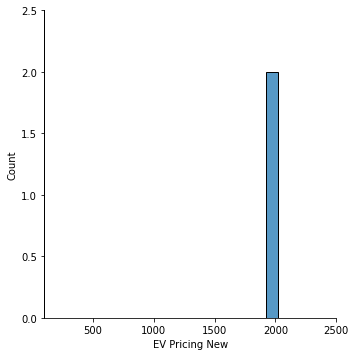

In [ ]:
# Now we check for outliers we will check after exclusing '0.0' from the distribution since it has the bulk of the data

import seaborn as sns

tmp_pricing = df_cs[df_cs['EV Pricing New']!=0.0]
tmp_pricing = tmp_pricing['EV Pricing New']

sns.displot(tmp_pricing, bins = 20, kde = False)
plt.xlim([100,2500])
plt.ylim([0,2.5])
plt.show()

> Hence, we can see **there exists 2 values of 2021 as EV Pricing that are skewing the distribution**

> We need to **impute these values as 0.0**

In [ ]:
df_cs.loc[df_cs['EV Pricing New'] > 2000, 'EV Pricing New'] = 0.0

In [ ]:
# We check our work

df_cs['EV Pricing New'].describe()

count    57329.000000
mean         0.063769
std          0.449255
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          9.990000
Name: EV Pricing New, dtype: float64

### **Perfect!**

> We can see that the **standard deviation is brought down significantly**

> Hence, **outliers have been removed successfully**

> The range of EV pricing now is between **0 - 9.99 dollars** - Which makes sense

In [ ]:
df_cs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57329 entries, 0 to 57551
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  57329 non-null  int64  
 1   Fuel Type Code      57329 non-null  int64  
 2   ZIP                 57329 non-null  int64  
 3   EV Level1 EVSE Num  1014 non-null   float64
 4   EV Level2 EVSE Num  42885 non-null  float64
 5   EV DC Fast Count    5510 non-null   float64
 6   EV Network          47776 non-null  object 
 7   EV Network Web      39646 non-null  object 
 8   Latitude            57329 non-null  float64
 9   Longitude           57329 non-null  float64
 10  EV Connector Types  47764 non-null  object 
 11  EV Pricing          14415 non-null  object 
 12  EV Pricing New      57329 non-null  float64
dtypes: float64(6), int64(3), object(4)
memory usage: 6.1+ MB


In [ ]:
# Now, we move onto the other columns

# EV Level1 EVSE Num and Level2 EVSE Num and EV DC Fast Count are float type - Hence, we just need to fill the 'NaN' values

df_cs['EV Level1 EVSE Num'] = df_cs['EV Level1 EVSE Num'].fillna(0)
df_cs['EV Level2 EVSE Num'] = df_cs['EV Level2 EVSE Num'].fillna(0)
df_cs['EV DC Fast Count'] = df_cs['EV DC Fast Count'].fillna(0)

In [ ]:
# We check our work

df_cs.head()

ID  Fuel Type Code    ZIP  EV Level1 EVSE Num  EV Level2 EVSE Num  \
0  17               0  36107                 0.0                 0.0   
1  42               0  30303                 0.0                 0.0   
2  45               0  30324                 0.0                 0.0   
3  64               0  30336                 0.0                 0.0   
4  72               0  77007                 0.0                 0.0   

   EV DC Fast Count EV Network EV Network Web   Latitude  Longitude  \
0               0.0        NaN            NaN  32.367916 -86.267021   
1               0.0        NaN            NaN  33.745843 -84.398837   
2               0.0        NaN            NaN  33.821911 -84.367461   
3               0.0        NaN            NaN  33.760256 -84.543822   
4               0.0        NaN            NaN  29.779918 -95.435385   

  EV Connector Types EV Pricing  EV Pricing New  
0                NaN        NaN             0.0  
1                NaN        NaN             0.0  
2                NaN        NaN             0.0  
3                NaN        NaN             0.0  
4                NaN        NaN             0.0

In [ ]:
# Now, we check the values in EV Network and EV Network Web

df_cs['EV Network'].value_counts()
# These are just the names of the companies that operate the charging stations, they could be used to identify best networks in our analysis later

ChargePoint Network    25641
Non-Networked           8130
Tesla Destination       4435
SemaCharge Network      1868
Blink Network           1588
Tesla                   1136
Greenlots                969
EV Connect               892
eVgo Network             856
Volta                    845
Electrify America        683
FLO                      228
OpConnect                145
FCN                      116
POWERFLEX                 71
Webasto                   61
AMPUP                     43
LIVINGSTON                30
EVGATEWAY                 21
EVCS                       8
CHARGELAB                  4
ZEFNET                     4
FPLEV                      2
Name: EV Network, dtype: int64

In [ ]:
df_cs['EV Network'].isna().sum()

# Hence, there are close to 10k NaN values

9553

In [ ]:
# We will fill the 'NaN' values in the 'EV Network' column with 'Unknown'

df_cs['EV Network'] = df_cs['EV Network'].fillna('Unknown')

In [ ]:
# We check our work

df_cs['EV Network'].value_counts().head(5)

ChargePoint Network    25641
Unknown                 9553
Non-Networked           8130
Tesla Destination       4435
SemaCharge Network      1868
Name: EV Network, dtype: int64

> We can see that we have **~10k rows** with **'Unknown'** EV Network that are imputed


In [ ]:
df_cs['EV Network Web'].value_counts().head(5)
# This column holds the website of the company in 'EV Network' column, not relevant in terms of modeling

http://www.chargepoint.com/                   25641
https://www.tesla.com/destination-charging     4435
https://semaconnect.com/                       1868
http://www.blinkcharging.com/                  1588
http://www.teslamotors.com/supercharger        1136
Name: EV Network Web, dtype: int64

> Both columns (EV Network and EV Network Web) are not relevant in terms of modeling hence, **we will drop them**

In [ ]:
df_cs.drop('EV Network Web', axis = 1, inplace = True)

In [ ]:
# We check our work

df_cs.head()

ID  Fuel Type Code    ZIP  EV Level1 EVSE Num  EV Level2 EVSE Num  \
0  17               0  36107                 0.0                 0.0   
1  42               0  30303                 0.0                 0.0   
2  45               0  30324                 0.0                 0.0   
3  64               0  30336                 0.0                 0.0   
4  72               0  77007                 0.0                 0.0   

   EV DC Fast Count EV Network   Latitude  Longitude EV Connector Types  \
0               0.0    Unknown  32.367916 -86.267021                NaN   
1               0.0    Unknown  33.745843 -84.398837                NaN   
2               0.0    Unknown  33.821911 -84.367461                NaN   
3               0.0    Unknown  33.760256 -84.543822                NaN   
4               0.0    Unknown  29.779918 -95.435385                NaN   

  EV Pricing  EV Pricing New  
0        NaN             0.0  
1        NaN             0.0  
2        NaN             0.0  
3        NaN             0.0  
4        NaN             0.0

In [ ]:
# Now, we just have one column left to check - EV Connector types

df_cs['EV Connector Types'].value_counts().head(10)

J1772                       36706
TESLA                        3206
CHADEMO J1772COMBO           2709
J1772 TESLA                  2520
CHADEMO J1772 J1772COMBO      625
CHADEMO J1772                 412
J1772COMBO                    378
J1772 NEMA515                 343
NEMA520                       244
NEMA515                       217
Name: EV Connector Types, dtype: int64

> Similar to EV Network Web, EV Connector types is also a text column not adding any value in terms of modeling. 

> Hence, **we will drop it**

> We will **also drop the older "EV Pricing" column**

In [ ]:
df_cs.drop('EV Connector Types', axis = 1, inplace = True)
df_cs.drop('EV Pricing', axis = 1, inplace = True)

In [ ]:
# We check our work

df_cs.head()

ID  Fuel Type Code    ZIP  EV Level1 EVSE Num  EV Level2 EVSE Num  \
0  17               0  36107                 0.0                 0.0   
1  42               0  30303                 0.0                 0.0   
2  45               0  30324                 0.0                 0.0   
3  64               0  30336                 0.0                 0.0   
4  72               0  77007                 0.0                 0.0   

   EV DC Fast Count EV Network   Latitude  Longitude  EV Pricing New  
0               0.0    Unknown  32.367916 -86.267021             0.0  
1               0.0    Unknown  33.745843 -84.398837             0.0  
2               0.0    Unknown  33.821911 -84.367461             0.0  
3               0.0    Unknown  33.760256 -84.543822             0.0  
4               0.0    Unknown  29.779918 -95.435385             0.0

> We can see that the '**chargingStations.csv**' file **has been cleaned** and is **ready to be merged** with '**zipcodes.txt**' file

> We can rearrage the columns of the file for clarity

In [ ]:
df_cs = df_cs[['ID','EV Network','ZIP','Latitude','Longitude','Fuel Type Code','EV Level1 EVSE Num','EV Level2 EVSE Num','EV DC Fast Count','EV Pricing New']]

# We check our work

df_cs.head()

ID EV Network    ZIP   Latitude  Longitude  Fuel Type Code  \
0  17    Unknown  36107  32.367916 -86.267021               0   
1  42    Unknown  30303  33.745843 -84.398837               0   
2  45    Unknown  30324  33.821911 -84.367461               0   
3  64    Unknown  30336  33.760256 -84.543822               0   
4  72    Unknown  77007  29.779918 -95.435385               0   

   EV Level1 EVSE Num  EV Level2 EVSE Num  EV DC Fast Count  EV Pricing New  
0                 0.0                 0.0               0.0             0.0  
1                 0.0                 0.0               0.0             0.0  
2                 0.0                 0.0               0.0             0.0  
3                 0.0                 0.0               0.0             0.0  
4                 0.0                 0.0               0.0             0.0

> We are keeping the '**Latitude**' and '**Longitude**' columns while merging with the 'zipcodes' file. **We can use thse columns as a validation point across both files** and then **drop them later**. 

## Merging 'chargingStations' and 'zipcodes'

> We will use an **outer join** here to **include all common entries + additional zipcodes not included in the 'chargingStations' file**

In [ ]:
df_main = pd.merge(df_zipcodes, df_cs, on='ZIP', how='outer') # We name the main dataset as 'df_main'
df_main.shape

(79252, 12)

The number of rows make sense since - 
*   The **zipcodes** file has **~33k** unique zipcodes
*   The **chargingstations** file has **~57k rows and ~11k unique zipcodes**
*   Hence, an **outer join** will have **all ~57k rows of chargingstation** + (33k-11k) = **22k rows with unique zipcodes that are presnet in the zipcodes** file
*   Hence, **57k + 22k = ~79k** 

### Perfect! We have a validation point.





In [ ]:
# We check our work

df_main.head()

ZIP        LAT        LNG  ID EV Network  Latitude  Longitude  \
0  601  18.180555 -66.749961 NaN        NaN       NaN        NaN   
1  602  18.361945 -67.175597 NaN        NaN       NaN        NaN   
2  603  18.455183 -67.119887 NaN        NaN       NaN        NaN   
3  606  18.158345 -66.932911 NaN        NaN       NaN        NaN   
4  610  18.295366 -67.125135 NaN        NaN       NaN        NaN   

   Fuel Type Code  EV Level1 EVSE Num  EV Level2 EVSE Num  EV DC Fast Count  \
0             NaN                 NaN                 NaN               NaN   
1             NaN                 NaN                 NaN               NaN   
2             NaN                 NaN                 NaN               NaN   
3             NaN                 NaN                 NaN               NaN   
4             NaN                 NaN                 NaN               NaN   

   EV Pricing New  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN

> We can quickly check whether the LAT and LNG matc hthe Latitude and Longitude for any of the matched rows

In [ ]:
df_main[df_main['ZIP']=='36107']

Empty DataFrame
Columns: [ZIP, LAT, LNG, ID, EV Network, Latitude, Longitude, Fuel Type Code, EV Level1 EVSE Num, EV Level2 EVSE Num, EV DC Fast Count, EV Pricing New]
Index: []

> We can see that it is **very close of a match** - Nevertheless a good validation point. **We can drop the Latitide and Longitude columns now** since we have decently accurate data in the LAT and LNG column that are available for ALL columns

In [ ]:
df_main.drop('Latitude', axis = 1, inplace = True)
df_main.drop('Longitude', axis = 1, inplace = True)

# We check our work

df_main.head()

ZIP        LAT        LNG  ID EV Network  Fuel Type Code  \
0  601  18.180555 -66.749961 NaN        NaN             NaN   
1  602  18.361945 -67.175597 NaN        NaN             NaN   
2  603  18.455183 -67.119887 NaN        NaN             NaN   
3  606  18.158345 -66.932911 NaN        NaN             NaN   
4  610  18.295366 -67.125135 NaN        NaN             NaN   

   EV Level1 EVSE Num  EV Level2 EVSE Num  EV DC Fast Count  EV Pricing New  
0                 NaN                 NaN               NaN             NaN  
1                 NaN                 NaN               NaN             NaN  
2                 NaN                 NaN               NaN             NaN  
3                 NaN                 NaN               NaN             NaN  
4                 NaN                 NaN               NaN             NaN

> We need to carry out a few more steps to clean this merged dataset properly

> The 'ZIP' column needs to be filled with starting zero's again upto 5 digits

> The 'NaN' values across columns (due to unavailability of data for 22k unique zipcodes in the 'zipcodes.txt' file) need to filled with 0s or 'Unknown' based on the column datatype

In [ ]:
# We start with fixing the 'ZIP' column

df_main['ZIP'] = df_main['ZIP'].apply(lambda x: '{0:0>5}'.format(x))

# We check our work

df_main.head()

ZIP        LAT        LNG  ID EV Network  Fuel Type Code  \
0  00601  18.180555 -66.749961 NaN        NaN             NaN   
1  00602  18.361945 -67.175597 NaN        NaN             NaN   
2  00603  18.455183 -67.119887 NaN        NaN             NaN   
3  00606  18.158345 -66.932911 NaN        NaN             NaN   
4  00610  18.295366 -67.125135 NaN        NaN             NaN   

   EV Level1 EVSE Num  EV Level2 EVSE Num  EV DC Fast Count  EV Pricing New  
0                 NaN                 NaN               NaN             NaN  
1                 NaN                 NaN               NaN             NaN  
2                 NaN                 NaN               NaN             NaN  
3                 NaN                 NaN               NaN             NaN  
4                 NaN                 NaN               NaN             NaN

> We need to **create a flag** to answer questions around total number of EV stations in a city or state

In [ ]:
# We create a column 'Flag' ->> Flag = 1 where station exists, Flag = 0 where station doesn't exist

df_main['Flag'] = np.where(df_main['ID'].notna(), 1, 0)

In [ ]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79252 entries, 0 to 79251
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ZIP                 79252 non-null  object 
 1   LAT                 78575 non-null  float64
 2   LNG                 78575 non-null  float64
 3   ID                  57329 non-null  float64
 4   EV Network          57329 non-null  object 
 5   Fuel Type Code      57329 non-null  float64
 6   EV Level1 EVSE Num  57329 non-null  float64
 7   EV Level2 EVSE Num  57329 non-null  float64
 8   EV DC Fast Count    57329 non-null  float64
 9   EV Pricing New      57329 non-null  float64
 10  Flag                79252 non-null  int64  
dtypes: float64(8), int64(1), object(2)
memory usage: 7.3+ MB


## **Adding External Datasets**

<img src = 'https://drive.google.com/uc?id=1I2OjJGxBFGkX6UsOr2kpXqo7GpcPt8Lk'>


### Additional Dataset 1 :

## https://simplemaps.com/data/us-zips

## This is a population and density dataset for the USA.

**Columns pulled -**

1.   ZIP -  US ZIPCODES
2.   population -Ppopulation currently residing in that particular zipcode
3.   density - Population density in that particular zipcode
4.   military - Does the zipcode fall under a military operated area


In [ ]:
# download the additional data 1 via gdown

# 1ZjPOLaci9g7hu0J9Apy16NzcBBSBLt8y

!gdown --id 1ZjPOLaci9g7hu0J9Apy16NzcBBSBLt8y

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1ZjPOLaci9g7hu0J9Apy16NzcBBSBLt8y
To: /content/uszips.csv
100% 6.32M/6.32M [00:00<00:00, 132MB/s]


In [ ]:
data1 = pd.read_csv('/content/uszips.csv')
data1.head()

# Now we choose the columns that are relevant to our analysis 

data1 = data1[['zip','population','density','military']]
data1.head()

zip  population  density  military
0  601     16773.0    100.5     False
1  602     37083.0    472.1     False
2  603     45652.0    513.2     False
3  606      6231.0     54.3     False
4  610     26502.0    275.7     False

In [ ]:
# We rename column 'zip' to 'ZIP' to make it common with our MAIN DATASET

data1 = data1.rename(columns={"zip": "ZIP"})

In [ ]:
# Now we check it's data types

data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33788 entries, 0 to 33787
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ZIP         33788 non-null  int64  
 1   population  32714 non-null  float64
 2   density     32714 non-null  float64
 3   military    33788 non-null  bool   
dtypes: bool(1), float64(2), int64(1)
memory usage: 825.0 KB


In [ ]:
# We need to fix the zipcodes - Fill zeros for codes that aren't 5 digits long

data1['ZIP'] = data1['ZIP'].apply(lambda x: '{0:0>5}'.format(x))

In [ ]:
# We check our work

data1.head()

ZIP  population  density  military
0  00601     16773.0    100.5     False
1  00602     37083.0    472.1     False
2  00603     45652.0    513.2     False
3  00606      6231.0     54.3     False
4  00610     26502.0    275.7     False

> We see that the **ZIPCODES** have been **filled with zeros from the front** upto 5 digits

### Additional Dataset 2 :
### https://www.epa.gov/egrid/power-profiler#/

## This is an egrid emissions dataset which records emissions of CO2, CH4 and SO2 in the respective ZIPCODE by the electric grids

**Columns pulled -**

1.   ZIP - US ZIPCODES
2.   CO2 - Annual Emission lb/mwH
2.   CH4 - Annual Emission lb/mwH
2.   SO2 - Annual Emission lb/mwH



In [ ]:
# download the additional data 2 via gdown

# 1EbWhCAe2arCOpu5rPwWFcfgzuNf6Mj84

!gdown --id 1EbWhCAe2arCOpu5rPwWFcfgzuNf6Mj84

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1EbWhCAe2arCOpu5rPwWFcfgzuNf6Mj84
To: /content/emissions.csv
100% 1.79M/1.79M [00:00<00:00, 120MB/s]


In [ ]:
data2 = pd.read_csv('/content/emissions.csv')
data2.head()

ZIP (character)  ZIP (numeric) state eGRID Subregion #1 eGRID Subregion #2  \
0                2              2    AK               AKMS                NaN   
1                6              6    AK               AKGD                NaN   
2                7              7    AK               AKMS                NaN   
3               10             10    AK               AKMS                NaN   
4               11             11    AK               AKGD                NaN   

  eGRID Subregion #3  CO2 emission  CH4 emission    SO2  
0                NaN       534.073         0.027  0.713  
1                NaN      1097.630         0.100  0.555  
2                NaN       534.073         0.027  0.713  
3                NaN       534.073         0.027  0.713  
4                NaN      1097.630         0.100  0.555

In [ ]:
# Now we select the rows that are relevant to us

data2 = data2[['ZIP (character)','CO2 emission','CH4 emission', 'SO2']]
data2.head()

ZIP (character)  CO2 emission  CH4 emission    SO2
0                2       534.073         0.027  0.713
1                6      1097.630         0.100  0.555
2                7       534.073         0.027  0.713
3               10       534.073         0.027  0.713
4               11      1097.630         0.100  0.555

In [ ]:
# We rename column 'ZIP (character)' to 'ZIP' to make it common with our MAIN DATASET
# We also rename SO2 to SO2 emission for consistency

data2 = data2.rename(columns={"ZIP (character)": "ZIP","SO2":"SO2 emission"})

In [ ]:
# We check the shape of the dataset

data2.shape

(41562, 4)

In [ ]:
# Now we check for missing values

data2 = data2.dropna()

# Now we delete all the duplicates

data2 = data2.drop_duplicates()

# We check the shape to see the number of zip code still retained 
data2.shape

(41562, 4)

> Hence, we conclude there **weren't any missing values or duplicate data in the dataset**

In [ ]:
# We need to fix the zipcodes - Fill zeros for codes that aren't 5 digits long

data2['ZIP'] = data2['ZIP'].apply(lambda x: '{0:0>5}'.format(x))

In [ ]:
# We check our work

data2.head()

ZIP  CO2 emission  CH4 emission  SO2 emission
0  00002       534.073         0.027         0.713
1  00006      1097.630         0.100         0.555
2  00007       534.073         0.027         0.713
3  00010       534.073         0.027         0.713
4  00011      1097.630         0.100         0.555

> We see that the **ZIPCODES** have been **filled with zeros from the front** upto 5 digits

### Additional Dataset 3:

### https://www.kaggle.com/datasets/pavansanagapati/us-wages-via-zipcode

### This dataset gives us the TaxReturns and Total Wages earned by individuals residing in a particular ZIPCODE

**Columns pulled -**

1.   TaxReturnFiled - Total count of individuals who filed tax returns in a particular ZIPCODE
2.   Total Wages - Total earnings of individuals living in a particular ZIPCODE
3.   ZIP - US ZIPCODES



In [ ]:
# download the additional data 3 via gdown

# 1ZonI9s_mXnj7KmcA2Wh1LRhgY9aLig--

!gdown --id 1ZonI9s_mXnj7KmcA2Wh1LRhgY9aLig--

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1ZonI9s_mXnj7KmcA2Wh1LRhgY9aLig--
To: /content/free-zipcode-database.csv
100% 13.0M/13.0M [00:00<00:00, 72.5MB/s]


In [ ]:
data3 = pd.read_csv('/content/free-zipcode-database.csv')
data3.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning:

Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.



RecordNumber  Zipcode ZipCodeType                 City State  \
0             1      704    STANDARD          PARC PARQUE    PR   
1             2      704    STANDARD  PASEO COSTA DEL SUR    PR   
2             3      704    STANDARD        SECT LANAUSSE    PR   
3             4      704    STANDARD      URB EUGENE RICE    PR   
4             5      704    STANDARD         URB GONZALEZ    PR   

     LocationType    Lat   Long  Xaxis  Yaxis  Zaxis WorldRegion Country  \
0  NOT ACCEPTABLE  17.96 -66.22   0.38  -0.87    0.3         NaN      US   
1  NOT ACCEPTABLE  17.96 -66.22   0.38  -0.87    0.3         NaN      US   
2  NOT ACCEPTABLE  17.96 -66.22   0.38  -0.87    0.3         NaN      US   
3  NOT ACCEPTABLE  17.96 -66.22   0.38  -0.87    0.3         NaN      US   
4  NOT ACCEPTABLE  17.96 -66.22   0.38  -0.87    0.3         NaN      US   

              LocationText                      Location  Decommisioned  \
0          Parc Parque, PR          NA-US-PR-PARC PARQUE          False   
1  Paseo Costa Del Sur, PR  NA-US-PR-PASEO COSTA DEL SUR          False   
2        Sect Lanausse, PR        NA-US-PR-SECT LANAUSSE          False   
3      Urb Eugene Rice, PR      NA-US-PR-URB EUGENE RICE          False   
4         Urb Gonzalez, PR         NA-US-PR-URB GONZALEZ          False   

   TaxReturnsFiled  EstimatedPopulation  TotalWages Notes  
0              NaN                  NaN         NaN   NaN  
1              NaN                  NaN         NaN   NaN  
2              NaN                  NaN         NaN   NaN  
3              NaN                  NaN         NaN   NaN  
4              NaN                  NaN         NaN   NaN

In [ ]:
# Now we select the rows that are relevant to us - We keep city since it has more data than our main dataset

data3 = data3[['Zipcode','State','City','TaxReturnsFiled','TotalWages']]
data3.head()

Zipcode State                 City  TaxReturnsFiled  TotalWages
0      704    PR          PARC PARQUE              NaN         NaN
1      704    PR  PASEO COSTA DEL SUR              NaN         NaN
2      704    PR        SECT LANAUSSE              NaN         NaN
3      704    PR      URB EUGENE RICE              NaN         NaN
4      704    PR         URB GONZALEZ              NaN         NaN

In [ ]:
# We rename column 'Zipcode' to 'ZIP' to make it common with our MAIN DATASET

data3 = data3.rename(columns={"Zipcode": "ZIP"})

In [ ]:
# Now we delete all the duplicates

data3 = data3.drop_duplicates()

# We check the shape to see the number of zip code still retained 
data3.shape

(81831, 5)

In [ ]:
# Now we impute the TaxReturnsFiled and TotalWages column with mean values for that state

data3['TaxReturnsFiled']=data3.groupby('State').transform(lambda x: x.fillna(x.mean()))['TaxReturnsFiled']
data3['TotalWages']=data3.groupby('State').transform(lambda x: x.fillna(x.mean()))['TotalWages']
data3

ZIP State                 City  TaxReturnsFiled    TotalWages
0        704    PR          PARC PARQUE              NaN           NaN
1        704    PR  PASEO COSTA DEL SUR              NaN           NaN
2        704    PR        SECT LANAUSSE              NaN           NaN
3        704    PR      URB EUGENE RICE              NaN           NaN
4        704    PR         URB GONZALEZ              NaN           NaN
...      ...   ...                  ...              ...           ...
81826  10200    NY        NEW YORK CITY      7172.521421  3.205184e+08
81827  10200    NY                   NY      7172.521421  3.205184e+08
81828  10200    NY              NY CITY      7172.521421  3.205184e+08
81829  10200    NY                  NYC      7172.521421  3.205184e+08
81830   9323    AE                  APO              NaN           NaN

[81831 rows x 5 columns]

In [ ]:
# We check the datatype for this additional dataset 3

data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81831 entries, 0 to 81830
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ZIP              81831 non-null  int64  
 1   State            81831 non-null  object 
 2   City             81831 non-null  object 
 3   TaxReturnsFiled  78257 non-null  float64
 4   TotalWages       78257 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 3.7+ MB


In [ ]:
# Now we deleted all the rows where TotalWages is 'NaN' since that is our column of interest

data3 = data3.dropna(subset=['TotalWages'])
data3 = data3.dropna(subset=['TaxReturnsFiled'])

In [ ]:
# Now, we check our work and observe the shape

data3.shape

(78257, 5)

> We see that we dropped **~3k rows after deleted 'NaN' values**

> This is fine since **it is a small percentage of the total number of rows**

In [ ]:
# We need to fix the zipcodes - Fill zeros for codes that aren't 5 digits long

data3['ZIP'] = data3['ZIP'].apply(lambda x: '{0:0>5}'.format(x))

In [ ]:
# We check our work

data3.head()

ZIP State        City  TaxReturnsFiled    TotalWages
112  07093    NJ     MONITOR          26571.0  1.071976e+09
113  07093    NJ      TAURUS          26571.0  1.071976e+09
114  07675    NJ    WESTWOOD          13245.0  1.089095e+09
115  07675    NJ  OLD TAPPAN          13245.0  1.089095e+09
116  07675    NJ  RIVER VALE          13245.0  1.089095e+09

> We see that the **ZIPCODES** have been **filled with zeros from the front** upto 5 digits

In [ ]:
# Now, we aggregate the dataset otherwise it will create multiple rows while merging

data3 = data3.groupby(['ZIP']).agg({'State':'first','City':'first','TaxReturnsFiled':'sum','TotalWages':'sum'}).reset_index()

# We check our work

data3.shape

(41656, 5)

> **Awesome**! We brought the rows down to the total number of unique zipcodes it actually has.

### Additional Dataset 4:

### https://www.irs.gov/statistics/soi-tax-stats-individual-income-tax-statistics-2019-zip-code-data-soi

### This dataset in the tax returns repository by the IRS for the year 2019

**Columns pulled-**

1.   ZIP - US ZIPCODES
2.   Average number of tax filing individuals in a particular ZIPCODE

In [ ]:
# download the additional data 4 via gdown

# https://drive.google.com/file/d/1dSVmrMIkgAw1h4jYzkeZ1HhGYhZhoPAd/view?usp=sharing
# 1dSVmrMIkgAw1h4jYzkeZ1HhGYhZhoPAd

!gdown --id 1dSVmrMIkgAw1h4jYzkeZ1HhGYhZhoPAd

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1dSVmrMIkgAw1h4jYzkeZ1HhGYhZhoPAd
To: /content/tax2019datazip.csv
100% 200M/200M [00:01<00:00, 121MB/s]


In [ ]:
data4 = pd.read_csv('/content/tax2019datazip.csv')
data4.head()

STATEFIPS STATE  zipcode  agi_stub        N1     mars1     MARS2     MARS4  \
0          1    AL        0         1  778210.0  491030.0   84770.0  189600.0   
1          1    AL        0         2  525940.0  247140.0  123910.0  139860.0   
2          1    AL        0         3  285700.0  105140.0  128140.0   44560.0   
3          1    AL        0         4  179070.0   38820.0  123110.0   13740.0   
4          1    AL        0         5  257010.0   28180.0  216740.0    7150.0   

        ELF    CPREP  ...  N85300  A85300    N11901    A11901    N11900  \
0  712890.0  30670.0  ...     0.0     0.0   62720.0   51936.0  671860.0   
1  481760.0  18960.0  ...     0.0     0.0   85860.0  122569.0  438020.0   
2  260570.0  10670.0  ...     0.0     0.0   73980.0  154932.0  212040.0   
3  164300.0   5020.0  ...     0.0     0.0   51330.0  139065.0  126850.0   
4  236850.0   8400.0  ...    90.0   141.0  104290.0  460071.0  152790.0   

      A11900    N11902     A11902  N12000   A12000  
0  1700965.0  669570.0  1694792.0  1980.0   3512.0  
1  1274802.0  435210.0  1266557.0  3670.0   7410.0  
2   575315.0  208470.0   564202.0  5020.0  13653.0  
3   401581.0  123310.0   388749.0  3040.0  10377.0  
4   598248.0  144640.0   539385.0  9180.0  56257.0  

[5 rows x 152 columns]

In [ ]:
# We check the shape of the dataset

data4.shape

(166159, 152)

In [ ]:
# We check the unique ZIPCODES 

data4['zipcode'].nunique()

27595

> We see that there are **27k unique zipcodes** in this file - which suits our purpose

> Now, we clean the data and take only those columns that are relevant to us

> The only one we want to pull is 'N2' (along with zipcode)

> N2 gives us the number of tax paying individuals residing in a particular zipcode

In [ ]:
data4 = data4[['zipcode','N2']]

In [ ]:
# Now, we rename column 'zipcode' to 'ZIP'

data4 = data4.rename(columns={"zipcode": "ZIP"})

# We check our work

data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166159 entries, 0 to 166158
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ZIP     166159 non-null  int64  
 1   N2      166159 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 2.5 MB


In [ ]:
data4['ZIP'] = data4['ZIP'].astype(str)

In [ ]:
# We check our work

data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166159 entries, 0 to 166158
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ZIP     166159 non-null  object 
 1   N2      166159 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [ ]:
# Now, we aggregate the dataset otherwise it will create multiple rows while merging

data4 = data4.groupby(['ZIP']).agg({'N2':'sum'}).reset_index()

# We check our work

data4.shape

(27595, 2)

> **Awesome**! We brought the rows down to the total number of unique zipcodes it actually has.

## Now all 4 of our datasets are ready to be merged!!

> We will **merge one at a time** 

### 1. Main Dataset (data_main) + Additional Dataset 1 (data1, population density)

### Rows added:

> Population - Float64

> Density - Float64

> Military - Area classified - Object

In [ ]:
df_main = pd.merge(df_main, data1, on='ZIP', how='left')

In [ ]:
df_main.head()

ZIP        LAT        LNG  ID EV Network  Fuel Type Code  \
0  00601  18.180555 -66.749961 NaN        NaN             NaN   
1  00602  18.361945 -67.175597 NaN        NaN             NaN   
2  00603  18.455183 -67.119887 NaN        NaN             NaN   
3  00606  18.158345 -66.932911 NaN        NaN             NaN   
4  00610  18.295366 -67.125135 NaN        NaN             NaN   

   EV Level1 EVSE Num  EV Level2 EVSE Num  EV DC Fast Count  EV Pricing New  \
0                 NaN                 NaN               NaN             NaN   
1                 NaN                 NaN               NaN             NaN   
2                 NaN                 NaN               NaN             NaN   
3                 NaN                 NaN               NaN             NaN   
4                 NaN                 NaN               NaN             NaN   

   Flag  population  density military  
0     0     16773.0    100.5    False  
1     0     37083.0    472.1    False  
2     0     45652.0    513.2    False  
3     0      6231.0     54.3    False  
4     0     26502.0    275.7    False

### 2. Main Dataset (data_main) + Additional Dataset 2 (data2, egrid emissions data)

### Rows added:

> CO2 emission - Float64

> CH4 emission - Float64

> SO2 emission - Float64

In [ ]:
df_main = pd.merge(df_main, data2, on='ZIP', how='left')

### 3. Main Dataset (data_main) + Additional Dataset 3 (data3, Wages data)

### Rows added:

> TaxReturnsFiled - Float64

> TotalWages - Float64

In [ ]:
df_main = pd.merge(df_main, data3, on='ZIP', how='left')

### 4. Main Dataset (data_main) + Additional Dataset 4 (data3, Tax returns data)

### Rows added:

> N2 (Number of tax filing individuals residing) - Float64


In [ ]:
df_main = pd.merge(df_main, data4, on='ZIP', how='left')

#  **Perfect**! We have now merged all 4 addtional datasets with the main dataset

<img src = 'https://drive.google.com/uc?id=1MVSILEV93EYKRAJ5zKf4hZ0MDEWtf7-y'>

> Now, we start with cleaning the dataset and imputing values wherever needed

> The goal would be to see how many zips can we retain with proper data across columns

In [ ]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79252 entries, 0 to 79251
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ZIP                 79252 non-null  object 
 1   LAT                 78575 non-null  float64
 2   LNG                 78575 non-null  float64
 3   ID                  57329 non-null  float64
 4   EV Network          57329 non-null  object 
 5   Fuel Type Code      57329 non-null  float64
 6   EV Level1 EVSE Num  57329 non-null  float64
 7   EV Level2 EVSE Num  57329 non-null  float64
 8   EV DC Fast Count    57329 non-null  float64
 9   EV Pricing New      57329 non-null  float64
 10  Flag                79252 non-null  int64  
 11  population          78085 non-null  float64
 12  density             78085 non-null  float64
 13  military            78680 non-null  object 
 14  CO2 emission        79160 non-null  float64
 15  CH4 emission        79160 non-null  float64
 16  SO2 

In [ ]:
# Now, aggregate the main dataset

df_main = df_main.groupby(['ZIP']).agg({'LAT':'first','LNG':'first','ID':'sum','EV Network':'sum','Fuel Type Code':'sum','EV Level1 EVSE Num':'sum','EV Level2 EVSE Num':'sum','EV DC Fast Count':'sum','EV Pricing New':'mean','Flag':'sum','population':'sum','density':'mean','military':'first','CO2 emission':'mean','CH4 emission':'mean','SO2 emission':'mean','State':'first','City':'first','TaxReturnsFiled':'sum','TotalWages':'sum','N2':'sum'}).reset_index()


In [ ]:
# We check the work

df_main.shape

(33431, 22)

In [ ]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33431 entries, 0 to 33430
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ZIP                 33431 non-null  object 
 1   LAT                 33144 non-null  float64
 2   LNG                 33144 non-null  float64
 3   ID                  33431 non-null  float64
 4   EV Network          33431 non-null  object 
 5   Fuel Type Code      33431 non-null  float64
 6   EV Level1 EVSE Num  33431 non-null  float64
 7   EV Level2 EVSE Num  33431 non-null  float64
 8   EV DC Fast Count    33431 non-null  float64
 9   EV Pricing New      11508 non-null  float64
 10  Flag                33431 non-null  int64  
 11  population          33431 non-null  float64
 12  density             32714 non-null  float64
 13  military            33017 non-null  object 
 14  CO2 emission        33350 non-null  float64
 15  CH4 emission        33350 non-null  float64
 16  SO2 

> Now, we just have to recode the one column '**Fuel Type Code**'

> Also, we will rename it as '**ELEC**' and it will be used for our classification model

In [ ]:
# renaming the column

df_main = df_main.rename(columns={"Fuel Type Code": "ELEC"})

In [ ]:
# Recoding Logic ->> Recode:1 if >= 1 else 0

df_main['ELEC'] = np.where(df_main['ELEC'] > 0, 1,0)

In [ ]:
# We also rename our flag column to 'Total EVS Count'

df_main = df_main.rename(columns={"Flag": "Total EVS Count"})

> Now, we impute the rest of the na's in EV Pricing New as 0.0


In [ ]:
df_main['EV Pricing New'] = df_main['EV Pricing New'].fillna(0)

> Correctional steps for State and City values

In [ ]:
df_main = df_main[df_main['LAT'].notna()]

In [ ]:
tmp = data3[['ZIP','State','City']]

In [ ]:
df_main = df_main.drop(columns = ['State','City'])

In [ ]:
df_main = pd.merge(df_main, tmp, on='ZIP', how='left')

In [ ]:
# We just rearrage the columns to make more sense

df_main = df_main[['State','City','ZIP','LAT','LNG','ID','ELEC','Total EVS Count','EV Pricing New','EV Network','EV Level1 EVSE Num','EV Level2 EVSE Num','EV DC Fast Count','population','density','military','CO2 emission','CH4 emission','SO2 emission','TaxReturnsFiled','TotalWages','N2']]

### **Finally**! We're good on the merged dataset :)

In [ ]:
# Imputing missing values

df_main['State'] = df_main['State'].fillna('Unknown')
df_main['City'] = df_main['City'].fillna('Unknown')
df_main['density'] = df_main['density'].fillna(0)
df_main['military'] = df_main['military'].fillna('False')
df_main['CO2 emission'] = df_main['CO2 emission'].fillna(0)
df_main['CH4 emission'] = df_main['CH4 emission'].fillna(0)
df_main['SO2 emission'] = df_main['SO2 emission'].fillna(0)

In [ ]:
# We check our work
df_main['ZIP'] = pd.to_numeric(df_main['ZIP'])
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33144 entries, 0 to 33143
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               33144 non-null  object 
 1   City                33144 non-null  object 
 2   ZIP                 33144 non-null  int64  
 3   LAT                 33144 non-null  float64
 4   LNG                 33144 non-null  float64
 5   ID                  33144 non-null  float64
 6   ELEC                33144 non-null  int64  
 7   Total EVS Count     33144 non-null  int64  
 8   EV Pricing New      33144 non-null  float64
 9   EV Network          33144 non-null  object 
 10  EV Level1 EVSE Num  33144 non-null  float64
 11  EV Level2 EVSE Num  33144 non-null  float64
 12  EV DC Fast Count    33144 non-null  float64
 13  population          33144 non-null  float64
 14  density             33144 non-null  float64
 15  military            33144 non-null  object 
 16  CO2 

# **Question**: Which states and cities have the highest count of charging stations?

In [ ]:
df_main[df_main['Total EVS Count']==df_main['Total EVS Count'].max()]

State        City    ZIP        LAT         LNG          ID  ELEC  \
30964    CA  MENLO PARK  94025  37.457524 -122.176542  64747168.0     1   

       Total EVS Count  EV Pricing New  \
30964              367        0.004687   

                                              EV Network  ...  \
30964  Non-NetworkedNon-NetworkedNon-NetworkedNon-Net...  ...   

       EV DC Fast Count  population  density  military  CO2 emission  \
30964              59.0  16146532.0   2030.6     False       513.455   

      CH4 emission  SO2 emission  TaxReturnsFiled    TotalWages          N2  
30964        0.032         0.044       20835324.0  4.435156e+11  13850580.0  

[1 rows x 22 columns]

> Hence, the **state and city** with the highest EV Chanrging Stations is **'MENLO PARK, CA'**

# **Question**: Are prices cheapest in States where there the most charging stations? 

In [ ]:
df_main_tmp = df_main[['ZIP','State','City','EV Pricing New','Total EVS Count']]

In [ ]:
df_main_tmp = df_main_tmp.loc[~((df_main_tmp['Total EVS Count'] == 0))]

In [ ]:
df_main_tmp = df_main_tmp.loc[~((df_main_tmp['EV Pricing New'] == 0))]

In [ ]:
df_main_tmp.sort_values('Total EVS Count',ascending = False)

ZIP State                  City  EV Pricing New  Total EVS Count
30964  94025    CA            MENLO PARK        0.004687              367
31202  95054    CA           SANTA CLARA        0.006899              258
30597  92618    CA                IRVINE        0.012611              226
30982  94080    CA   SOUTH SAN FRANCISCO        0.062500              172
30396  92101    CA             SAN DIEGO        0.082222              126
...      ...   ...                   ...             ...              ...
25736  74571    OK              TALIHINA        0.320000                1
30777  93314    CA           BAKERSFIELD        0.280000                1
3438   12776    NY                ROSCOE        0.280000                1
25749  74637    OK               FAIRFAX        1.150000                1
33084  99755    AK  DENALI NATIONAL PARK        0.460000                1

[2392 rows x 5 columns]

> A large portion of our data is weighed towards having a EV Pricing of '0.0' due to unavailability of data. However, after extracting the zeros out, we can see that '**CA**' has the least **EV Pricing** and the Max **Total EVS count**

# EXPLORATORY DATA ANALYSIS

In [ ]:
df_main.head()

State     City  ZIP        LAT        LNG   ID  ELEC  Total EVS Count  \
0  Unknown  Unknown  601  18.180555 -66.749961  0.0     0                0   
1  Unknown  Unknown  602  18.361945 -67.175597  0.0     0                0   
2  Unknown  Unknown  603  18.455183 -67.119887  0.0     0                0   
3  Unknown  Unknown  606  18.158345 -66.932911  0.0     0                0   
4  Unknown  Unknown  610  18.295366 -67.125135  0.0     0                0   

   EV Pricing New EV Network  ...  EV DC Fast Count  population  density  \
0             0.0          0  ...               0.0     16773.0    100.5   
1             0.0          0  ...               0.0     37083.0    472.1   
2             0.0          0  ...               0.0     45652.0    513.2   
3             0.0          0  ...               0.0      6231.0     54.3   
4             0.0          0  ...               0.0     26502.0    275.7   

   military  CO2 emission CH4 emission  SO2 emission  TaxReturnsFiled  \
0     False      1602.184        0.085         4.292              0.0   
1     False      1602.184        0.085         4.292              0.0   
2     False      1602.184        0.085         4.292              0.0   
3     False      1602.184        0.085         4.292              0.0   
4     False      1602.184        0.085         4.292              0.0   

   TotalWages   N2  
0         0.0  0.0  
1         0.0  0.0  
2         0.0  0.0  
3         0.0  0.0  
4         0.0  0.0  

[5 rows x 22 columns]

In [ ]:
df_eda = df_main.fillna(0)

In [ ]:
df_eda.dtypes

State                  object
City                   object
ZIP                     int64
LAT                   float64
LNG                   float64
ID                    float64
ELEC                    int64
Total EVS Count         int64
EV Pricing New        float64
EV Network             object
EV Level1 EVSE Num    float64
EV Level2 EVSE Num    float64
EV DC Fast Count      float64
population            float64
density               float64
military               object
CO2 emission          float64
CH4 emission          float64
SO2 emission          float64
TaxReturnsFiled       float64
TotalWages            float64
N2                    float64
dtype: object

In [ ]:
df_eda['State']=df_eda['State'].astype(str)
df_eda['City']=df_eda['City'].astype(str)
df_eda['ZIP']=df_eda['ZIP'].astype(str)
df_eda['ELEC']=df_eda['ELEC'].astype(str)
df_eda['ID']=df_eda['ID'].astype(str)

### **Table 1**: Descriptive Statistics For All Columns

In [ ]:
from IPython import display
with pd.option_context('display.max_columns', None):
  display.display(df_eda.describe(include = 'all'))

State     City    ZIP           LAT           LNG     ID   ELEC  \
count   33144    33144  33144  33144.000000  33144.000000  33144  33144   
unique     52    17381  33144           NaN           NaN  11171      2   
top        TX  Unknown    601           NaN           NaN    0.0      0   
freq     1935      155      1           NaN           NaN  21923  24209   
mean      NaN      NaN    NaN     38.819930    -90.924452    NaN    NaN   
std       NaN      NaN    NaN      5.391254     15.787902    NaN    NaN   
min       NaN      NaN    NaN     13.260372   -176.629994    NaN    NaN   
25%       NaN      NaN    NaN     35.389437    -97.234251    NaN    NaN   
50%       NaN      NaN    NaN     39.493230    -88.192612    NaN    NaN   
75%       NaN      NaN    NaN     42.120854    -80.219373    NaN    NaN   
max       NaN      NaN    NaN     71.253500    145.754437    NaN    NaN   

        Total EVS Count  EV Pricing New  EV Network  EV Level1 EVSE Num  \
count      33144.000000    33144.000000     33144.0        33144.000000   
unique              NaN             NaN      3813.0                 NaN   
top                 NaN             NaN         0.0                 NaN   
freq                NaN             NaN     21923.0                 NaN   
mean           1.709269        0.023904         NaN            0.094738   
std            5.999956        0.258538         NaN            1.581568   
min            0.000000        0.000000         NaN            0.000000   
25%            0.000000        0.000000         NaN            0.000000   
50%            0.000000        0.000000         NaN            0.000000   
75%            1.000000        0.000000         NaN            0.000000   
max          367.000000        9.990000         NaN           98.000000   

        EV Level2 EVSE Num  EV DC Fast Count    population       density  \
count         33144.000000      33144.000000  3.314400e+04  33144.000000   
unique                 NaN               NaN           NaN           NaN   
top                    NaN               NaN           NaN           NaN   
freq                   NaN               NaN           NaN           NaN   
mean              2.946446          0.601315  5.247689e+04    499.038487   
std              13.753049          2.802212  2.336460e+05   1909.966418   
min               0.000000          0.000000  0.000000e+00      0.000000   
25%               0.000000          0.000000  7.017500e+02      7.200000   
50%               0.000000          0.000000  2.967000e+03     29.600000   
75%               0.000000          0.000000  1.889050e+04    259.500000   
max             823.000000         62.000000  1.614653e+07  61244.700000   

       military  CO2 emission  CH4 emission  SO2 emission  TaxReturnsFiled  \
count     33144  33144.000000  33144.000000  33144.000000     3.314400e+04   
unique        2           NaN           NaN           NaN              NaN   
top       False           NaN           NaN           NaN              NaN   
freq      32938           NaN           NaN           NaN              NaN   
mean        NaN    832.783316      0.071660      0.545273     5.486786e+04   
std         NaN    278.761026      0.033218      0.646921     3.189990e+05   
min         NaN      0.000000      0.000000      0.000000     0.000000e+00   
25%         NaN    623.111000      0.050000      0.173000     1.407750e+03   
50%         NaN    835.079000      0.060000      0.389000     4.866000e+03   
75%         NaN    984.977000      0.086000      0.662000     1.709750e+04   
max         NaN   1652.952000      0.178000      6.771000     2.660357e+07   

          TotalWages            N2  
count   3.314400e+04  3.314400e+04  
unique           NaN           NaN  
top              NaN           NaN  
freq             NaN           NaN  
mean    2.349532e+09  4.238198e+04  
std     1.291848e+10  2.010734e+05  
min     0.000000e+00  0.000000e+00  
25%     4.330077e+07  2.500000e+02  
50%     1.719543e+08  1

### **Table 2**: Correllation Matrix

In [ ]:
a1 = df_eda.corr()
a1.style.background_gradient(cmap='coolwarm').set_precision(2)

### **Table 3**: Electric Charging Station Spread By State

In [ ]:
df_state = df_eda.groupby('State').agg({'LAT':'mean','LNG':'mean','population':'sum','Total EVS Count':'sum'}).reset_index()
df_state = df_state.sort_values('Total EVS Count', ascending = False).reset_index(drop = True)
df_state.head(10)

State        LAT         LNG   population  Total EVS Count
0    CA  36.428134 -119.922705  535523615.0            14873
1    NY  42.263433  -75.137895   84616387.0             3032
2    TX  31.262829  -97.766561  110841809.0             3009
3    FL  28.163096  -82.025626   86559662.0             2788
4    MA  42.232507  -71.534579   48016092.0             2002
5    WA  47.348296 -121.125865   52008531.0             1866
6    GA  32.970813  -83.640396   57467105.0             1745
7    CO  39.233213 -105.344243   44871120.0             1694
8    IL  40.370132  -89.011364   46597693.0             1442
9    PA  40.642561  -77.661380   39214335.0             1424

> The table above displays states with the highest total Electric Charging Stations. The average latidude and longitude is computed for plotting the map shown below.

### **Plot 1**: Electric Charging Station Spread by State

In [ ]:
fig = px.choropleth(locations=df_state["State"], locationmode="USA-states", color = np.log(df_state['Total EVS Count']), scope="usa", title = 'Electric Charging Station Spread By State')
fig.show()

> Displayed above is the state-wise spread of Total Electric Charging Facilites across all states. We can see that **states with high population also tend to have more Electric Charging Facilites**. We can see that the **number of Electric charging Stations is directly proportional to the population of the assosciated to the state.** For this plot, the count of electrice charging facilities was taken in log scale.

### **Table 4:**Electric Charging Station Spread by City

In [ ]:
df_city = df_eda.groupby('City').agg({'LAT':'mean','LNG':'mean','population':'sum','Total EVS Count':'sum'}).reset_index()
df_city = df_city.sort_values('Total EVS Count', ascending = False).reset_index(drop = True)
df_topcity = df_city.head(500)
df_topcity.head(10)

City        LAT         LNG  population  Total EVS Count
0    LOS ANGELES  34.042209 -118.303468  38312164.0             1162
1        ATLANTA  34.929389  -86.064196  18749639.0              749
2         IRVINE  34.783570 -111.216234  20742847.0              566
3      SAN DIEGO  32.658516 -116.644448  19973348.0              564
4         AUSTIN  31.520410  -97.287452  17315408.0              551
5       SAN JOSE  37.345013 -120.237972  18068922.0              550
6    KANSAS CITY  39.103613  -94.575432   6795536.0              522
7  SAN FRANCISCO  37.764229 -122.428560   9514615.0              517
8        SEATTLE  47.593450 -122.329986  11914031.0              472
9     MENLO PARK  37.457524 -122.176542  16146532.0              367

> The table above displays cities with the **highest total Electric Charging Stations.** The average latidude and longitude is computed for plotting the map shown below.

### **Plot 2:** City-wise spread of Total Electric Charging Facilites for the top 500 cities

In [ ]:
fig = px.scatter_mapbox(df_topcity, lat="LAT", lon="LNG", color = 'population', size = df_topcity['Total EVS Count']/10, zoom=2, height=500)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

> Displayed above is the city-wise spread of Total Electric Charging Facilites for the top 500 cities. **Cities with high population also tend to have more Electric Charging Facilites. We can see that the number of Electric charging Stations is directly proportional to the population of the assosciated city.**

### **Plot 3:** State ZIP Code Count With Electric Charging Stations

In [ ]:
df_elec_state = df_eda.groupby('State').apply(lambda df: df['ELEC'].value_counts()).reset_index()
df_elec_state.columns = ['State','ELEC','Count']
df_elec_state = df_elec_state.sort_values(['ELEC','Count'], ascending = False).reset_index(drop = True)
# Plotting the stacked bar chart.
fig = px.bar(df_elec_state, x="State", y="Count", color="ELEC", title="State ZIP Code Count With Electric Charging Stations")
fig.show()

> The stacked bar chart above shows the most number of ZIP codes by State, that have Electric charging Stations. We can see that the state of California has 1154 Zip Codes with Electric Charging Stations and New York has 650 ZIP Codes Electric Charging Stations.

### **Plot 4:** State ZIP Codes With No Electric Charging Stations

In [ ]:
mask = df_elec_state['ELEC'] == '0'
df_elec_state = df_elec_state[mask].sort_values('Count', ascending = False).reset_index(drop = True)
# Plotting the bar chart.
fig = px.bar(df_elec_state, x="State", y="Count", color="ELEC", title="State ZIP Codes With No Electric Charging Stations")
fig.show()

> The bar chart above shows the most number of ZIP codes by State, that do not have Electric Charging Stations. We can see that Pennsylvia has 1480 ZIP codes with Non Electric Charging Stations and Texas has 1422 ZIP codes Non Electric Charging Stations.

### **Plot 5:** Electric Charging Station  Spread - Total Wages Vs. Population

In [ ]:
normalize = lambda x:((x-x.mean())/x.std())

In [ ]:
x = normalize(df_eda['population'])
y = normalize(df_eda['TotalWages'])
fig = px.scatter(df_eda, x = x, y = y, color = "ELEC", title = 'Electric Charging Station Spread - Total Wages Vs. Population')
fig.show()

> From the above scatterplot, we can infer that for ZIP codes with **smaller population** and with **lesser per capita income**, **it is very unlikey to find stations with electric charging capacity.** 

### **Plot 6:** Electric VS No Electric Charging Stations For Zip Codes Across USA

In [ ]:
# Re-scaling the population to set the marker radius to fit on the map.
marker_size = 1.5*np.log(df_eda['population']+1)

In [ ]:
# Plotting the map for zip codes with electric vs non - electric stations with population as marker size.
mask_elec = df_eda['ELEC'] == '1'
mask_non_elec = df_eda['ELEC'] == '0'

fig = go.Figure()

site_lat = df_eda['LAT'][mask_non_elec]
site_lon = df_eda['LNG'][mask_non_elec]
locations_name = df_eda['ZIP'][mask_non_elec]

fig.add_trace(go.Scattermapbox(
        lat=site_lat,
        lon=site_lon,
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=marker_size[mask_non_elec],
            color='rgb(255, 0, 0)',
            opacity=0.3
        ),
        hoverinfo='none'
    ))

site_lat = df_eda['LAT'][mask_elec]
site_lon = df_eda['LNG'][mask_elec]
locations_name = df_eda['ZIP'][mask_elec]

fig.add_trace(go.Scattermapbox(
        lat=site_lat,
        lon=site_lon,
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=marker_size[mask_elec],
            color='rgb(124,252,0)',
            opacity=0.6
        ),
        text=locations_name,
        hoverinfo='text'
    ))

fig.update_layout(
    title='Electric VS No Electric Charging Stations For Zip Codes Across USA',
    autosize=True,
    hovermode='closest',
    showlegend=False,
    mapbox_style="open-street-map"
)

fig.show()

> In the map above, **green points** represent **stations with Electric Charging Facilites**, and **red points** represent **stations without Electric Charging Facilities**. We can infer from this distribution that **as we get closer towards large cities, the chances of finding Electric charging stations increase.**

### **Plot 7** CO2, CH4, SO2 Emissions at Locations With & Without Electic Charging Stations

In [ ]:
fig = px.box(df_eda, y="CO2 emission", facet_col = 'ELEC')
fig.show()
fig = px.box(df_eda, y="CH4 emission", facet_col = 'ELEC')
fig.show()
fig = px.box(df_eda, y="SO2 emission", facet_col = 'ELEC')
fig.show()

> From the boxplots shown above, we can see that **CO2, CH4 and SO2 emissons are lower when ELEC = 1** (ZIP Codes having electric charging stations installed), as compared with ELEC = 0 (ZIP Codes having no electric charging stations installed).

### **Plot 8:** Electric charging Facility Spread - Tax Returns Filed Vs. Total Wages

In [ ]:
x = normalize(df_eda['TotalWages'])
y = normalize(df_eda['TaxReturnsFiled'])
fig = px.scatter(df_eda, x = x, y = y, color = "ELEC", title = 'Electric charging Facility Spread - Tax Returns Filed Vs. Total Wages')
fig.show()

### **Table 5:** Consolidated Earnings by State

In [ ]:
tmp_eda = df_eda.iloc[:, [20]]

tmp_eda.groupby(df_eda['State']).agg(['mean', 'max'])

TotalWages              
                 mean           max
State                              
AK       2.097159e+08  8.026927e+09
AL       5.696288e+08  2.295176e+10
AR       5.131442e+08  4.802025e+10
AZ       1.670823e+09  3.976754e+10
CA       1.100332e+10  1.028271e+12
CO       4.036298e+09  1.400553e+11
CT       2.546153e+09  1.018370e+11
DC       4.601310e+09  3.092008e+10
DE       1.876222e+09  2.712228e+10
FL       4.013366e+09  1.522307e+11
GA       3.267532e+09  3.238603e+11
HI       4.602955e+09  8.113591e+10
IA       6.030717e+08  5.502254e+10
ID       8.564669e+08  7.563233e+10
IL       1.873036e+09  2.175527e+11
IN       1.330417e+09  1.268589e+11
KS       1.799005e+09  1.743883e+11
KY       8.470913e+08  8.197684e+10
LA       5.432252e+08  1.605226e+10
MA       4.187622e+09  1.063476e+11
MD       4.348515e+09  1.550199e+11
ME       3.728960e+08  2.094353e+10
MI       1.156707e+09  7.652859e+10
MN       1.799575e+09  9.971888e+10
MO       1.256389e+09  1.054604e+11
MS       7.572207e+08  6.288491e+10
MT       1.952294e+08  1.116034e+10
NC       1.848009e+09  1.283363e+11
ND       3.593954e+08  1.700575e+10
NE       2.378608e+08  1.187531e+10
NH       4.886369e+08  1.606203e+10
NJ       2.745036e+09  5.794264e+10
NM       8.880099e+08  7.442513e+10
NV       2.691286e+09  4.403191e+10
NY       3.288682e+09  2.890347e+11
OH       1.650346e+09  9.853069e+10
OK       6.634547e+08  2.427970e+10
OR       2.458235e+09  1.412891e+11
PA       1.903105e+09  1.670997e+11
RI       2.563397e+09  2.079562e+10
SC       1.400679e+09  3.991979e+10
SD       4.590198e+08  3.485265e+10
TN       1.304830e+09  7.584012e+10
TX       1.814119e+09  1.794633e+11
UT       7.446000e+09  3.384873e+11
Unknown  0.000000e+00  0.000000e+00
VA       2.258572e+09  3.521776e+11
VT       1.546381e+09  9.316170e+10
WA       5.946874e+09  8.035986e+11
WI       1.174783e+09  2.994085e+10
WV       1.895462e+08  1.143636e+10
WY       5.591694e+08  1.846957e+10

> We can see that states like '**NY**', '**WA**' and '**CA**' have the **highest total earnings** which points towards high accumulation of EV buyers and development of charging stations

### **Table 6:** Summary of Electric Charging Stations in NEW YORK

In [ ]:
df_ny = df_eda[df_eda["State"] == 'NY']
df_ny[['City','Total EVS Count']].sort_values(by = 'Total EVS Count', ascending = False)

City  Total EVS Count
3505  SARATOGA SPRINGS               69
3232            ALBANY               43
3137      CLIFTON PARK               40
3212              TROY               37
4073           BUFFALO               36
...                ...              ...
3574           REDFORD                0
2939         HEMPSTEAD                0
3572      RAINBOW LAKE                0
3571         PORT KENT                0
1830    FISHERS ISLAND                0

[1794 rows x 2 columns]

> Hence, **Saratoga Springs** and **Albany** have the maximum number of Electric Charging Stations

### **Table 7:** Summary of Electric Charging Stations in CALIFORNIA

In [ ]:
df_ca = df_eda[df_eda["State"] == 'CA']
df_ca[['City','Total EVS Count']].sort_values(by = 'Total EVS Count', ascending = False)

City  Total EVS Count
30964           MENLO PARK              367
31202          SANTA CLARA              258
30597               IRVINE              226
30982  SOUTH SAN FRANCISCO              172
30641              ANAHEIM              139
...                    ...              ...
31273       RAIL ROAD FLAT                0
31274          SAN ANDREAS                0
31275          SAN ANDREAS                0
31276            VALLECITO                0
30723         FRAZIER PARK                0

[1763 rows x 2 columns]

> **Menlo Park**, **Santa Clara** and **Irvine** have the maximum number of Electric Charging Stations

### **Table 8:** Summary of Electric Charging Stations in WASHINGTON

In [ ]:
df_ca = df_eda[df_eda["State"] == 'WA']
df_ca[['City','Total EVS Count']].sort_values(by = 'Total EVS Count', ascending = False)

City  Total EVS Count
32311   BELLEVUE              105
32370    SEATTLE               65
32378    SEATTLE               63
32362    SEATTLE               58
32894   RICHLAND               54
...          ...              ...
32652    NASELLE                0
32651       LYLE                0
32648  LA CENTER                0
32647  KLICKITAT                0
32607    RAINIER                0

[598 rows x 2 columns]

> We can see that **most of the EV charging stations are concentrated around Seattle & Bellevue** which are the HQs of **major tech companies** like **Amazon**, **CostCo**, etc.

### **Table 9:** ZIPCODE Area Coverage vs Total EVS Count

In [ ]:
df_eda['Area'] = df_eda['population']/df_eda['density']
df_eda[['State','City','Area','population','density', 'Total EVS Count']].sort_values(by = 'density', ascending = False)

State              City       Area  population  density  Total EVS Count
2609     NY          NEW YORK   0.318591     19512.0  61244.7                3
2594     NY          NEW YORK  13.118776    767392.0  58495.7               16
2835     NY  LONG ISLAND CITY   0.358743     18381.0  51237.2                3
2617     NY          NEW YORK  12.904539    637923.0  49434.0               11
2610     NY          NEW YORK   4.895655    225910.0  46145.0               10
...     ...               ...        ...         ...      ...              ...
9266     SC          COLUMBIA        NaN         0.0      0.0                0
24902    AR          BURDETTE        NaN         0.0      0.0                0
9255     SC          COLUMBIA        NaN         0.0      0.0                1
9235     SC        STATE PARK        NaN         0.0      0.0                0
11791    AL       POINT CLEAR        NaN         0.0      0.0                2

[33144 rows x 6 columns]

> We can see that **NEW YORK CITY being the densest city has very LOW coverage of Electric Charging Stations** - THis could be attributed to **heavy use of public transportation**

### **Table 10** 

In [ ]:
df_eda[['State','City','ZIP','EV Pricing New']].sort_values(by = 'EV Pricing New', ascending = False).head(50)

State             City    ZIP  EV Pricing New
29181    AZ          GILBERT  85296        9.990000
32423    WA           CUSTER  98240        9.990000
32113    OR           ELKTON  97436        9.990000
32098    OR       BLUE RIVER  97413        9.990000
32162    OR       WOLF CREEK  97497        9.990000
32635    WA      CASTLE ROCK  98611        9.990000
32059    OR         MONMOUTH  97361        9.990000
26001    TX           DALLAS  75225        9.990000
6024     PA     PHILADELPHIA  19136        9.950000
31954    OR            BANKS  97106        8.745000
31914    OR  GOVERNMENT CAMP  97028        7.500000
32136    OR          OAKLAND  97462        7.500000
32240    OR     WARM SPRINGS  97761        7.500000
32153    OR           VENETA  97487        7.500000
32480    WA         CHIMACUM  98325        7.500000
31944    OR          WELCHES  97067        7.500000
32465    WA           SULTAN  98294        7.500000
32050    OR      GRAND RONDE  97347        7.500000
31901    OR    CASCADE LOCKS  97014        7.500000
20214    MT             BABB  59411        5.000000
7254     VA          HAMPTON  23669        5.000000
26746    TX          HOUSTON  77084        5.000000
12185    TN        DANDRIDGE  37725        4.995000
32100    OR        BROOKINGS  97415        4.995000
32102    OR      CANYONVILLE  97417        4.995000
32138    OR      PORT ORFORD  97465        4.995000
32051    OR           HALSEY  97348        4.250000
32045    OR          DETROIT  97342        3.890000
32354    WA  SNOQUALMIE PASS  98068        3.750000
10732    FL            MIAMI  33126        3.549000
9766     GA          ATLANTA  30317        3.333333
15811    MI         BRIGHTON  48116        3.330000
10204    GA           ALBANY  31701        3.330000
29091    AZ          PHOENIX  85024        3.330000
32106    OR    COTTAGE GROVE  97424        3.247500
5946     PA          DRESHER  19025        3.000000
31953    OR          ASTORIA  97103        2.995000
32577    WA        CENTRALIA  98531        2.567500
32223    OR         CRESCENT  97733        2.500000
2040     NJ     SOUTH ORANGE   7079        2.500000
12262    TN      SEVIERVILLE  37876        2.500000
5400     PA          HANOVER  17331        2.500000
32140    OR        REEDSPORT  97467        2.500000
28411    WY           HUDSON  82515        2.500000
32462    WA        SKYKOMISH  98288        2.500000
32163    OR          YACHATS  97498        2.500000
6539     MD         PASADENA  21122        2.500000
1899     CT       BRIDGEPORT   6608        2.500000
2306     NJ         BELLMAWR   8031        2.500000
31903    OR       CLATSKANIE  97016        2.500000

> We can see that **cities in OREGON** comprise of **~50%** of the **top 50** most expensive cities for EV Charging

### **Plot 9:** CO2 emission across the United States

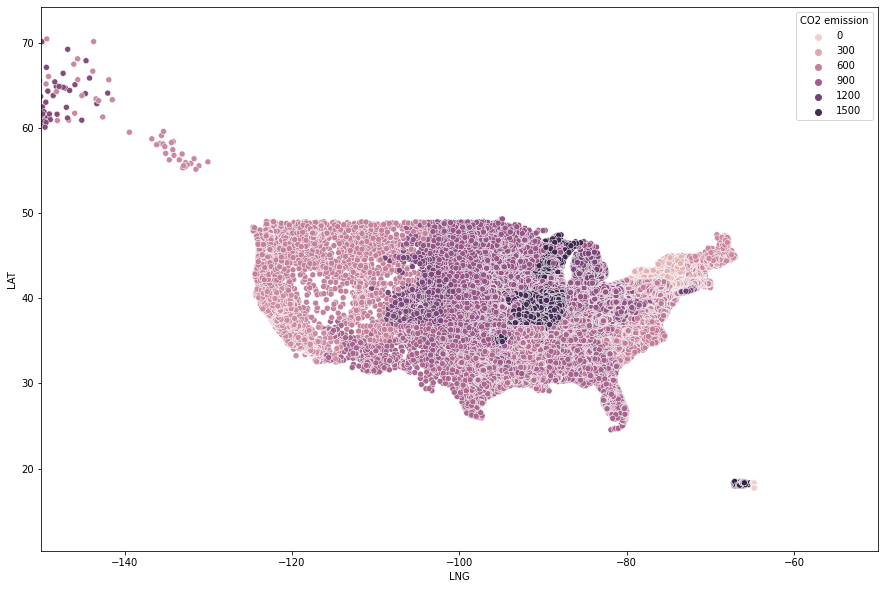

In [ ]:
plt.figure (figsize=(15,10))
sns.scatterplot(x = 'LNG', y = 'LAT', hue = 'CO2 emission', data = df_eda)
plt.xlim([-150,-50])
plt.show()

### **Plot 10:** CH4 emission across the United States

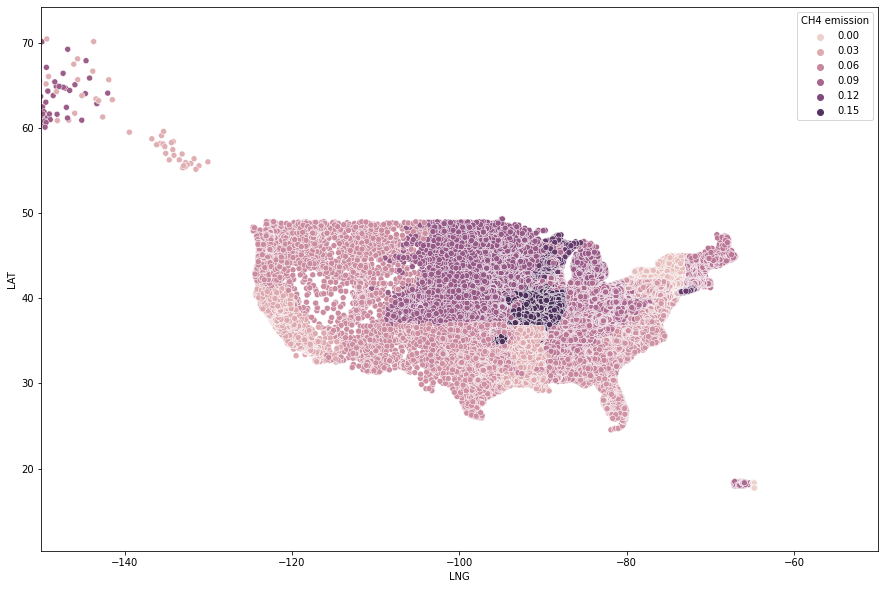

In [ ]:
plt.figure (figsize=(15,10))
sns.scatterplot(x = 'LNG', y = 'LAT', hue = 'CH4 emission', data = df_eda)
plt.xlim([-150,-50])
plt.show()

> For both these plots, can see that the **high CO2 and CH4 emissions are contained in central USA** - Coincidentally, **it is where we observe least amount of EV usage** based on availability of charging stations

# MODELING

## ELEC

In [ ]:
from sklearn.model_selection import train_test_split

X1 = df_main.drop(['ELEC', 'Total EVS Count', 'State', 'City', 'EV Network', 'ID', 'military', 'EV Pricing New', 'EV Level1 EVSE Num', 'EV Level2 EVSE Num', 'EV DC Fast Count'], axis=1) 
y1 = df_main['ELEC'] # target 

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, 
                                                    test_size=0.2, # 80/20 split
                                                    random_state=4) # group number

X1_train = np.array(X1_train)
X1_test = np.array(X1_test)
y1_train = np.array(y1_train)
y1_test = np.array(y1_test)

### Model 1: Logistic

In [ ]:
from sklearn.linear_model import LogisticRegression 
LR1 = LogisticRegression()
LR1 = LR1.fit(X1_train, y1_train)

In [ ]:
train_preds1 = LR1.predict(X1_train)
test_preds1 = LR1.predict(X1_test)

In [ ]:
# confusion matrix
confusion_matrix(y1_test, test_preds1)

array([[4549,  295],
       [ 589, 1196]])

In [ ]:
# error metrics
print(classification_report(y1_test, test_preds1))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      4844
           1       0.80      0.67      0.73      1785

    accuracy                           0.87      6629
   macro avg       0.84      0.80      0.82      6629
weighted avg       0.86      0.87      0.86      6629



### Model 2: ML

In [ ]:
# Construct some pipelines

pipe_ada = Pipeline([('scl', StandardScaler()),
			('clf', AdaBoostClassifier(random_state=4))])

pipe_rf = Pipeline([('scl', StandardScaler()),
			('clf', RandomForestClassifier(random_state=4))])


# and remember, for now these are just boring vanilla defaults... the grid is coming!			

In [ ]:
# Set grid search params

grid_params_ada = [{'clf__n_estimators': [3, 5],
		                'clf__learning_rate': [0.001, 0.01]}]


grid_params_rf = [{'clf__criterion': ['gini', 'entropy'],
                  'clf__min_samples_split': [10],
                  'clf__n_estimators': [100]}]

In [ ]:
# Construct grid searches

gs_ada = GridSearchCV(estimator=pipe_ada,
    param_grid=grid_params_ada,
    scoring='accuracy',
    cv=10)


gs_rf = GridSearchCV(estimator=pipe_rf,
    param_grid=grid_params_rf,
    scoring='accuracy',
    cv=10)


# List of pipelines for ease of iteration

grids = [gs_ada, gs_rf]

grid_dict = {0: 'ADA',
             1: 'RF'}

In [ ]:

# Fit the grid search objects
print('Performing model optimizations...')
best_acc = 0.0
best_clf = 0
best_gs = ''
for idx, gs in enumerate(grids):
	print('\nEstimator: %s' % grid_dict[idx])	
	# Fit grid search	
	gs.fit(X1_train, y1_train)
	# Best params
	print('Best params: %s' % gs.best_params_)
	# Best training data accuracy
	print('Best training accuracy: %.3f' % gs.best_score_)
	# Predict on test data with best params
	y1_pred = gs.predict(X1_test)
	# Test data accuracy of model with best params
	print('Test set accuracy score for best params: %.3f ' % accuracy_score(y1_test, y1_pred))
	# Track best (highest test accuracy) model
	if accuracy_score(y1_test, y1_pred) > best_acc:
		best_acc = accuracy_score(y1_test, y1_pred)
		best_gs = gs
		best_clf = idx
print('\nClassifier with best test set accuracy: %s' % grid_dict[best_clf])

Performing model optimizations...

Estimator: ADA
Best params: {'clf__learning_rate': 0.001, 'clf__n_estimators': 3}
Best training accuracy: 0.877
Test set accuracy score for best params: 0.879 

Estimator: RF
Best params: {'clf__criterion': 'entropy', 'clf__min_samples_split': 10, 'clf__n_estimators': 100}
Best training accuracy: 0.889
Test set accuracy score for best params: 0.892 

Classifier with best test set accuracy: RF


### Model 3: autoML

In [ ]:
df_main_copy = df_main.copy()
df_main_copy = df_main_copy.sample(frac = 0.15, random_state = 4)

In [ ]:
X_automl = df_main_copy.drop(['ELEC', 'Total EVS Count', 'State', 'City', 'EV Network', 'ID', 'military', 'EV Pricing New', 'EV Level1 EVSE Num', 'EV Level2 EVSE Num', 'EV DC Fast Count'], axis=1) 
y_automl = df_main_copy['ELEC']

In [ ]:
X_automl_train, X_automl_test, y_automl_train, y_automl_test = train_test_split(X_automl, y_automl, 
                                                    test_size=0.2, # 80/20 split
                                                    random_state=4) # group number

In [ ]:
X_automl_train = np.array(X_automl_train)
X_automl_test = np.array(X_automl_test)
y_automl_train = np.array(y_automl_train)
y_automl_test = np.array(y_automl_test)

In [ ]:
!pip install tpot

In [ ]:
from tpot import TPOTClassifier
import time

# Construct and fit TPOT classifier
start_time = time.time()
tpot = TPOTClassifier(generations=1, verbosity=2)
tpot.fit(X_automl_train, y_automl_train)
end_time = time.time()

# Results
print('TPOT classifier finished in %s seconds' % (end_time - start_time)) 
print('Best pipeline test accuracy: %.3f' % tpot.score(X_automl_test, y_automl_test))

# Save best pipeline as Python script file
# make sure you update this path
tpot.export('tpot_Classifier_pipeline.py') # this will locally download on the left

Optimization Progress:   0%|          | 0/200 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8853421194020417

Best pipeline: ExtraTreesClassifier(PCA(input_matrix, iterated_power=7, svd_solver=randomized), bootstrap=False, criterion=gini, max_features=0.7500000000000001, min_samples_leaf=6, min_samples_split=9, n_estimators=100)
TPOT classifier finished in 767.7565994262695 seconds
Best pipeline test accuracy: 0.895


In [ ]:
from sklearn.feature_selection import SelectFwe, f_classif
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

clean1 = df_main.drop(['Total EVS Count', 'State', 'City', 'EV Network', 'ID', 'military', 'EV Pricing New', 'EV Level1 EVSE Num', 'EV Level2 EVSE Num', 'EV DC Fast Count'], axis=1) 

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
# tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
tpot_data = clean1 # the clean data set

# RENAME THE TARGET VARIABLE!
# you need to add this line of code...
# this is not included in the TPOT output!
tpot_data.rename(columns={'ELEC' : 'target'}, inplace=True)

features = tpot_data.drop('target', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'], random_state=None)

# Average CV score on the training set was: 0.9824175824175825
exported_pipeline = make_pipeline(
    RobustScaler(),
    SelectFwe(score_func=f_classif, alpha=0.002),
    LogisticRegression(C=1.0, dual=False, penalty="l2")
)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)

# you need to add this line of code to 
# evalaute the accuracy - 98%!!!
accuracy_score(testing_target, results)

0.8842626116340816

## Total EVS Count

In [ ]:
from sklearn.model_selection import train_test_split
X2 = df_main.drop(['ELEC', 'Total EVS Count', 'State', 'City', 'EV Network', 'ID', 'military', 'EV Pricing New', 'EV Level1 EVSE Num', 'EV Level2 EVSE Num', 'EV DC Fast Count'], axis=1) 
y2 = df_main['Total EVS Count'] # target 

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, 
                                                    test_size=0.2, # 80/20 split
                                                    random_state=4) # group number

X2_train = np.array(X2_train)
X2_test = np.array(X2_test)
y2_train = np.array(y2_train)
y2_test = np.array(y2_test)

### Model 4: Linear


In [ ]:
from sklearn.linear_model import LinearRegression 
LR2 = LinearRegression()
LR2 = LR2.fit(X2_train, y2_train)

In [ ]:
train_preds2 = LR2.predict(X2_train)
test_preds2 = LR2.predict(X2_test)

In [ ]:
# calculate the R2

print("train_preds2 R2:", r2_score(y2_train, train_preds2))
print("test_preds2 R2:", r2_score(y2_test, test_preds2))

train_preds2 R2: 0.7676926010008744
test_preds2 R2: 0.7842464503263267


In [ ]:
# MAE

print("Pred1 mae:", mean_absolute_error(y2_train, train_preds2))
print("Pred2 mae:", mean_absolute_error(y2_test, test_preds2))

Pred1 mae: 1.0442253006246587
Pred2 mae: 1.0480978118779452


In [ ]:
# MSE

print("Pred1 mse:", mean_squared_error(y2_train, train_preds2))
print("Pred2 mse:", mean_squared_error(y2_test, test_preds2))

Pred1 mse: 8.324028605740226
Pred2 mse: 7.9099538477028055


### Model 5: ML

In [ ]:
# import modules
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
# Construct some pipelines

pipe_ada2 = Pipeline([('scl', StandardScaler()),
			('clf', AdaBoostRegressor(random_state=4))])

pipe_gb2 = Pipeline([('scl', StandardScaler()),
			('clf', GradientBoostingRegressor(random_state=4))])

# and remember, for now these are just boring vanilla defaults... the grid is coming!			

In [ ]:
# Set grid search params

grid_params_ada2 = [{'clf__n_estimators': [3],
		                'clf__learning_rate': [0.01]}]

grid_params_gb2 = [{'clf__n_estimators': [3],
		                'clf__learning_rate': [0.01]}]

In [ ]:
# Construct grid searches

gs_ada2 = GridSearchCV(estimator=pipe_ada2,
    param_grid=grid_params_ada2,
    scoring='neg_mean_absolute_error',
    cv=10)

gs_gb2 = GridSearchCV(estimator=pipe_gb2,
    param_grid=grid_params_gb2,
    scoring='neg_mean_absolute_error',
    cv=10)


# List of pipelines for ease of iteration

grids2 = [gs_ada2, gs_gb2]

grid_dict2 = {0: 'ADA2',
             1: 'GB2'}

In [ ]:
# Fit the grid search objects
print('Performing model optimizations...')
best_mae = np.inf
best_clf = 0
best_gs = ''
for idx, gs in enumerate(grids2):
	print('\nEstimator: %s' % grid_dict2[idx])	
	# Fit grid search	
	gs.fit(X2_train, y2_train)
	# Best params
	print('Best params: %s' % gs.best_params_)
	# Lowest training data error
	print('Lowest training Error: %.3f' % -gs.best_score_)
	# Predict on test data with best params
	y2_pred = gs.predict(X2_test)
	# Test data accuracy of model with best params
	print('Test set lowest error for best params:%.3f ' % mean_absolute_error(y2_test, y2_pred))
	# Track best (highest test accuracy) model
	if mean_absolute_error(y2_test, y2_pred) < best_mae:
		best_mae = mean_absolute_error(y2_test, y2_pred)
		best_gs = gs
		best_clf = idx
print('\nModel with best test set error: %s' % grid_dict[best_clf])

Performing model optimizations...

Estimator: ADA2
Best params: {'clf__learning_rate': 0.01, 'clf__n_estimators': 3}
Lowest training Error: 0.995
Test set lowest error for best params:1.023 

Estimator: GB2
Best params: {'clf__learning_rate': 0.01, 'clf__n_estimators': 3}
Lowest training Error: 2.344
Test set lowest error for best params:2.402 

Model with best test set error: ADA


### Model 6: autoML

In [ ]:
X2_automl = df_main_copy.drop(['ELEC', 'Total EVS Count', 'State', 'City', 'EV Network', 'ID', 'military', 'EV Pricing New', 'EV Level1 EVSE Num', 'EV Level2 EVSE Num', 'EV DC Fast Count'], axis=1) 
y2_automl = df_main_copy['Total EVS Count']

In [ ]:
X2_automl_train, X2_automl_test, y2_automl_train, y2_automl_test = train_test_split(X2_automl, y2_automl, 
                                                    test_size=0.2, # 80/20 split
                                                    random_state=4) # group number

In [ ]:
X2_automl_train = np.array(X2_automl_train)
X2_automl_test = np.array(X2_automl_test)
y2_automl_train = np.array(y2_automl_train)
y2_automl_test = np.array(y2_automl_test)

In [ ]:
from tpot import TPOTRegressor

In [ ]:
# Construct and fit TPOT classifier
start_time = time.time()
tpot = TPOTRegressor(generations=1, verbosity=2, scoring='neg_mean_absolute_error')
tpot.fit(X2_automl_train, y2_automl_train)
end_time = time.time()

# Results
print('TPOT regressor finished in %s seconds' % (end_time - start_time)) 
print('Best pipeline test neg(MAE): %.3f' % tpot.score(X2_automl_test, y2_automl_test))

# Save best pipeline as Python script file
tpot.export('tpot_Regressor_pipeline.py') # look left!

Optimization Progress:   0%|          | 0/200 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.9285120212067903

Best pipeline: ExtraTreesRegressor(ElasticNetCV(input_matrix, l1_ratio=0.5, tol=0.0001), bootstrap=True, max_features=1.0, min_samples_leaf=4, min_samples_split=19, n_estimators=100)
TPOT regressor finished in 510.21491050720215 seconds
Best pipeline test neg(MAE): -1.189


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LassoLarsCV
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator, ZeroCount

clean2 = df_main.drop(['ELEC', 'State', 'City', 'EV Network', 'ID', 'military', 'EV Pricing New', 'EV Level1 EVSE Num', 'EV Level2 EVSE Num', 'EV DC Fast Count'], axis=1) 

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
# make sure you update the paths!
tpot_data = clean2

# RENAME THE TARGET VARIABLE!
# this is not included in the TPOT output!
tpot_data.rename(columns={'Total EVS Count' : 'target'}, inplace=True)

features = tpot_data.drop('target', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'], random_state=None)

# Average CV score on the training set was: -2.0421724260530723
exported_pipeline = make_pipeline(
    ZeroCount(),
    StackingEstimator(estimator=GradientBoostingRegressor(alpha=0.75, learning_rate=0.1, loss="quantile", max_depth=6, max_features=0.6500000000000001, min_samples_leaf=4, min_samples_split=14, n_estimators=100, subsample=0.7500000000000001)),
    LassoLarsCV(normalize=False)
)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)
print(mean_absolute_error(testing_target, results))

# results is just a vector - you can make scatterplots and calculate error metrics.

0.949847531665131


# ERRORS

## Linear Regression: Scatter Plots & Error Metrices

### Training Dataset: Scatterplot

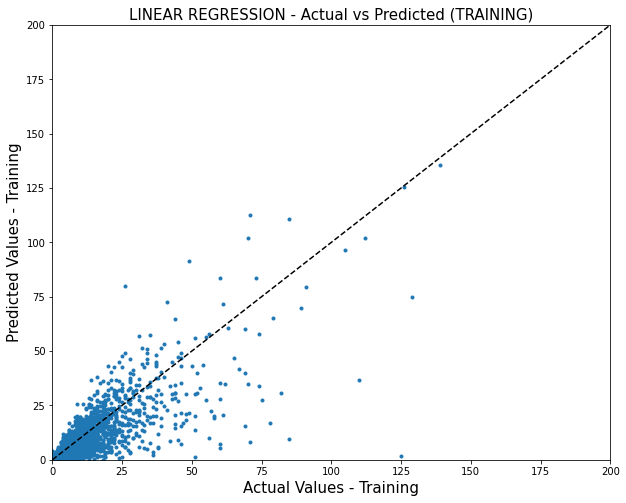

In [ ]:
# Scatterplot for Training dataset

a = '.' # marker type stored in variable 'a'
plt.figure(figsize = (10,8)) # setting the size for the plot
plt.scatter(x = y2_train, y = train_preds2, marker = a) # creating a scatter plot for actuals vs predicted values - specified marker type 
plt.plot([0,300], [0,300], '--k')
plt.xlim([0,200])
plt.ylim([0,200])
plt.title('LINEAR REGRESSION - Actual vs Predicted (TRAINING)', size = 15)
plt.xlabel('Actual Values - Training', size = 15)
plt.ylabel('Predicted Values - Training', size = 15)
plt.show()
 

### Training Dataset: Error Metrices

In [ ]:
print("R2 Score - Training:", r2_score(y2_train, train_preds2))

R2 Score - Training: 0.7676926010008744


In [ ]:
print("Mean Absolute Error - Training:", mean_absolute_error(y2_train, train_preds2))

Mean Absolute Error - Training: 1.0442253006246587


In [ ]:
print("Mean Squared Error - Training:", mean_squared_error(y2_train, train_preds2))

Mean Squared Error - Training: 8.324028605740226


In [ ]:
print("Mean Absolute Percentage Error - Training:", mean_absolute_percentage_error(y2_train, train_preds2))

Mean Absolute Percentage Error - Training: 1686908966764041.2


### Test Dataset: Scatterplot

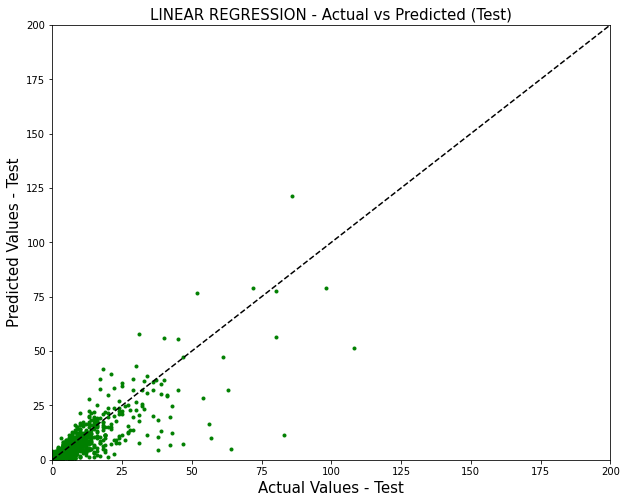

In [ ]:
# Scatterplot for Test dataset

a = '.' # marker type stored in variable 'a'
plt.figure(figsize = (10,8)) # setting the size for the plot
plt.scatter(x = y2_test, y = test_preds2, marker = a, color = 'green') # creating a scatter plot for actuals vs predicted values - specified marker type 
plt.title('LINEAR REGRESSION - Actual vs Predicted (Test)', size = 15)
plt.plot([0, 300], [0, 300], '--k')
plt.xlim([0,200])
plt.ylim([0,200])
plt.xlabel('Actual Values - Test', size = 15)
plt.ylabel('Predicted Values - Test', size = 15)
plt.show()
 

### Test Dataset: Error Metrices

In [ ]:
print("R2 Score - Test:", r2_score(y2_test, test_preds2))

R2 Score - Test: 0.7842464503263267


In [ ]:
print("Mean Absolute Error - Test:", mean_absolute_error(y2_test, test_preds2))

Mean Absolute Error - Test: 1.0480978118779452


In [ ]:
print("Mean Squared Error - Test:", mean_squared_error(y2_test, test_preds2))

Mean Squared Error - Test: 7.9099538477028055


In [ ]:
print("Mean Absolute Percentage Error - Test:", mean_absolute_percentage_error(y2_test, test_preds2))

Mean Absolute Percentage Error - Test: 1680089351552757.5


## Logistic Regression: Confusion Matrix & Classification Report

### Training Dataset: Confusion Matrix

In [ ]:
cm1 = confusion_matrix(y1_train, train_preds1)

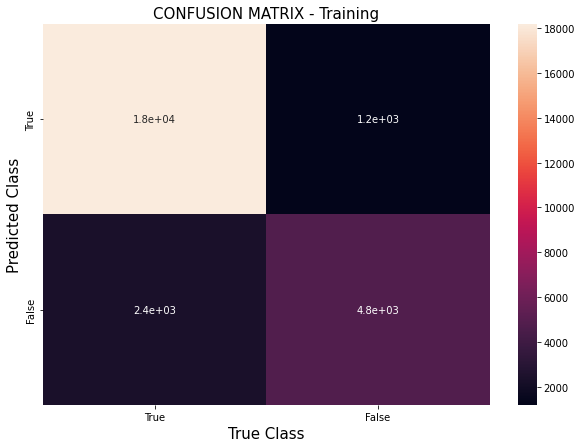

In [ ]:
df_cm1 = pd.DataFrame(cm1, index = ['True', 'False'],
                  columns = ['True', 'False'])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm1, annot=True)
plt.title('CONFUSION MATRIX - Training', size = 15)
plt.xlabel('True Class', size = 15)
plt.ylabel('Predicted Class', size = 15)
plt.show()

### Test Dataset: Confusion Matrix

In [ ]:
cm2 = confusion_matrix(y1_test, test_preds1)

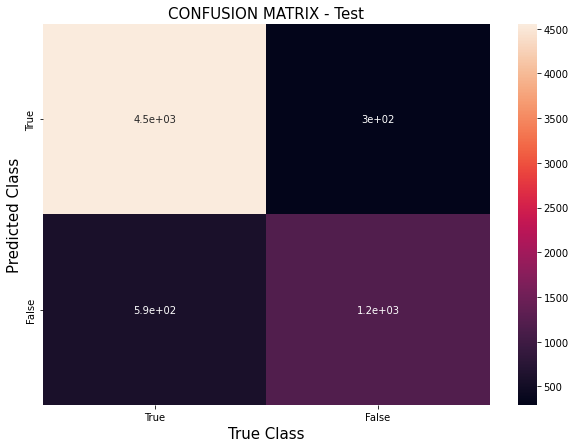

In [ ]:
df_cm1 = pd.DataFrame(cm2, index = ['True', 'False'],
                  columns = ['True', 'False'])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm1, annot=True)
plt.title('CONFUSION MATRIX - Test', size = 15)
plt.xlabel('True Class', size = 15)
plt.ylabel('Predicted Class', size = 15)
plt.show()

# INTERPRETABILITY

## Permutation Feature Importance

### **Model 1**: Logistic Regression + **Model 2**: Random Forest Classifier + **Model 3**: TPOT Classifier 

In [ ]:
column_names = ['ZIP','LAT','LNG','population','density','CO2 emission','CH4 emission','SO2 emission','TaxReturnsFiled','TotalWages','N2']
x = pd.DataFrame(columns = column_names)
x

Empty DataFrame
Columns: [ZIP, LAT, LNG, population, density, CO2 emission, CH4 emission, SO2 emission, TaxReturnsFiled, TotalWages, N2]
Index: []

In [ ]:
column_names = ['ELEC']
y = pd.DataFrame(columns = column_names)
y

Empty DataFrame
Columns: [ELEC]
Index: []

In [ ]:
column_names = ['Total EVS Count']
y2 = pd.DataFrame(columns = column_names)
y2

Empty DataFrame
Columns: [Total EVS Count]
Index: []

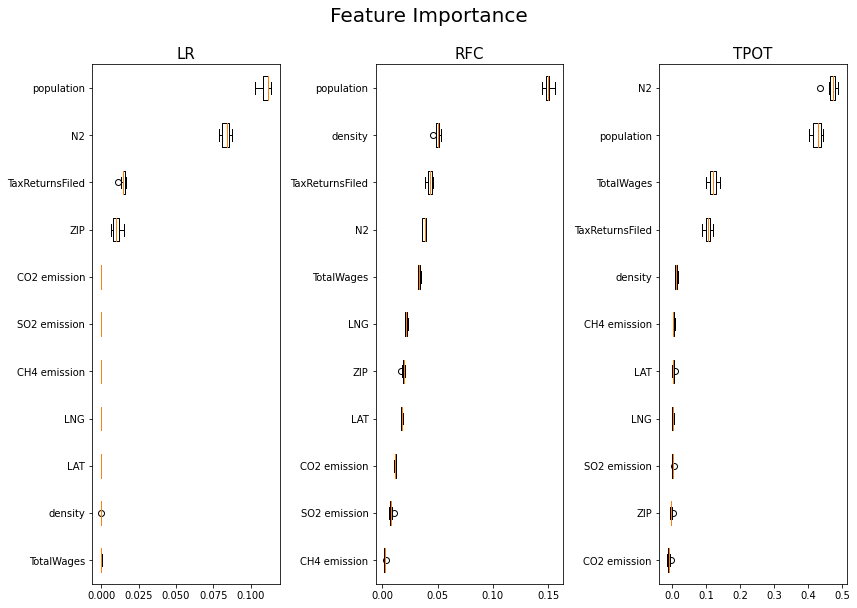

In [ ]:
# plot basics
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 8)) # 1 row, 3 columns
plt.suptitle('Feature Importance', y= 1.05, size = 20)
# LR
clf = LR1

result = permutation_importance(clf, X1_test, y1_test, n_repeats = 10, random_state = 4)
perm_sorted_idx = result.importances_mean.argsort()
ax1.boxplot(result.importances[perm_sorted_idx].T, vert = False, labels = x.columns[perm_sorted_idx])
ax1.set_title('LR', size = 15)

# RFC
clf = RandomForestClassifier()
clf = clf.fit(X1_test, y1_test)

result = permutation_importance(clf, X1_test, y1_test, n_repeats = 10, random_state = 4)
perm_sorted_idx = result.importances_mean.argsort()
ax2.boxplot(result.importances[perm_sorted_idx].T, vert = False, labels = x.columns[perm_sorted_idx])
ax2.set_title('RFC', size = 15)

# TPOT
clf = tpot

result = permutation_importance(clf, X_automl_test, y_automl_test, n_repeats = 10, random_state = 4)
perm_sorted_idx = result.importances_mean.argsort()
ax3.boxplot(result.importances[perm_sorted_idx].T, vert = False, labels = x.columns[perm_sorted_idx])
ax3.set_title('TPOT', size = 15)

fig.tight_layout()
plt.show()

### **Model 4**: Linear Regression + **Model 5**: ADA Classifier + **Model 6**: TPOT Classifier

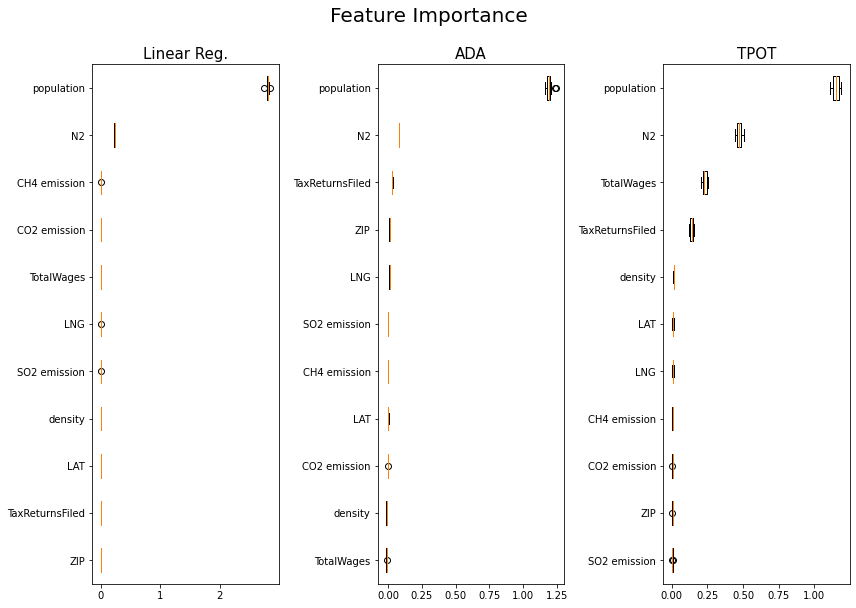

In [ ]:
# plot basics
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 8)) # 1 row, 3 columns
plt.suptitle('Feature Importance', y= 1.05, size = 20)
# LR
clf = LR2

result = permutation_importance(clf, X2_test, y2_test, n_repeats = 10, random_state = 4)
perm_sorted_idx = result.importances_mean.argsort()
ax1.boxplot(result.importances[perm_sorted_idx].T, vert = False, labels = x.columns[perm_sorted_idx])
ax1.set_title('Linear Reg.', size = 15)

# ADA
clf = AdaBoostRegressor()
clf = clf.fit(X2_test,y2_test)

result = permutation_importance(clf, X2_test, y2_test, n_repeats = 10, random_state = 4)
perm_sorted_idx = result.importances_mean.argsort()
ax2.boxplot(result.importances[perm_sorted_idx].T, vert = False, labels = x.columns[perm_sorted_idx])
ax2.set_title('ADA', size = 15)

# TPOT
clf = tpot

result = permutation_importance(clf, X2_automl_test, y2_automl_test, n_repeats = 10, random_state = 4)
perm_sorted_idx = result.importances_mean.argsort()
ax3.boxplot(result.importances[perm_sorted_idx].T, vert = False, labels = x.columns[perm_sorted_idx])
ax3.set_title('TPOT', size = 15)

fig.tight_layout()
plt.show()

## Partial Dependence Plots

> Installing the relevant libraries

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# to get rid of annoying future warnings...

In [ ]:
!pip install pulp # for partial dependence plots!
!pip install pycebox
from pycebox.ice import ice, ice_plot

> We are taking a smaller sample for faster processing

In [ ]:
test_X1_df = pd.DataFrame(X1_test, columns= x.columns)
test_X1_df = test_X1_df.sample(frac = 0.1, random_state = 4)
test_X1_df.head()

ZIP        LAT        LNG  population  density  CO2 emission  \
2425  31217.0  32.844147 -83.500044     17044.0     61.1       860.179   
1264   7939.0  40.667382 -74.553908       254.0    726.9       652.458   
1802   3857.0  43.070909 -70.946875      9161.0    280.9       528.238   
4182  11356.0  40.784850 -73.841279     24178.0   5902.8       634.612   
20    32754.0  28.687109 -80.919193     11398.0     32.1       835.079   

      CH4 emission  SO2 emission  TaxReturnsFiled    TotalWages       N2  
2425         0.060         0.189      7553.000000  1.710820e+08  13680.0  
1264         0.045         0.255     17619.753104  8.958389e+08      0.0  
1802         0.074         0.084      4562.000000  2.048194e+08      0.0  
4182         0.022         0.010     31476.000000  1.071020e+09  24510.0  
20           0.049         0.152      5007.000000  1.820053e+08  10660.0

In [ ]:
test_y1_df = pd.DataFrame(y1_test, columns= y.columns)
test_y1_df = test_y1_df.sample(frac = 0.1, random_state = 4)
test_y1_df.head()

ELEC
2425     0
1264     0
1802     1
4182     1
20       0

In [ ]:
test_y1_df_arr = np.array(test_y1_df)
test_X1_df_arr = np.array(test_X1_df)

> Setting up the structure for ICE

In [ ]:
def plot_ice_grid(dict_of_ice_dfs, data_df, features, ax_ylabel='', nrows=5, 
                  ncols=2, figsize=(12, 12), sharex=False, sharey=True,
                  num_grid_points = 10, # DW added this on 4/27/2022! 
                  subplots_kws={}, rug_kws={'color':'k'}, **ice_plot_kws):
    """A function that plots ICE plots for different features in a grid."""
    fig, axes = plt.subplots(nrows=nrows, 
                             ncols=ncols, 
                             figsize=figsize,
                             sharex=sharex,
                             sharey=sharey,
                             **subplots_kws)
    # for each feature plot the ice curves and add a rug at the bottom of the 
    # subplot
    for f, ax in zip(features, axes.flatten()):
        ice_plot(dict_of_ice_dfs[f], ax=ax, **ice_plot_kws)
        # add the rug
        sns.distplot(data_df[f], ax=ax, hist=False, kde=False, 
                     rug=True, rug_kws=rug_kws)
        ax.set_title('feature = ' + f)
        ax.set_ylabel(ax_ylabel)
        sns.despine()
        
    # get rid of blank plots
    for i in range(len(features), nrows*ncols):
        axes.flatten()[i].axis('off')

    return fig

## Classification Models

### Logistic Regression

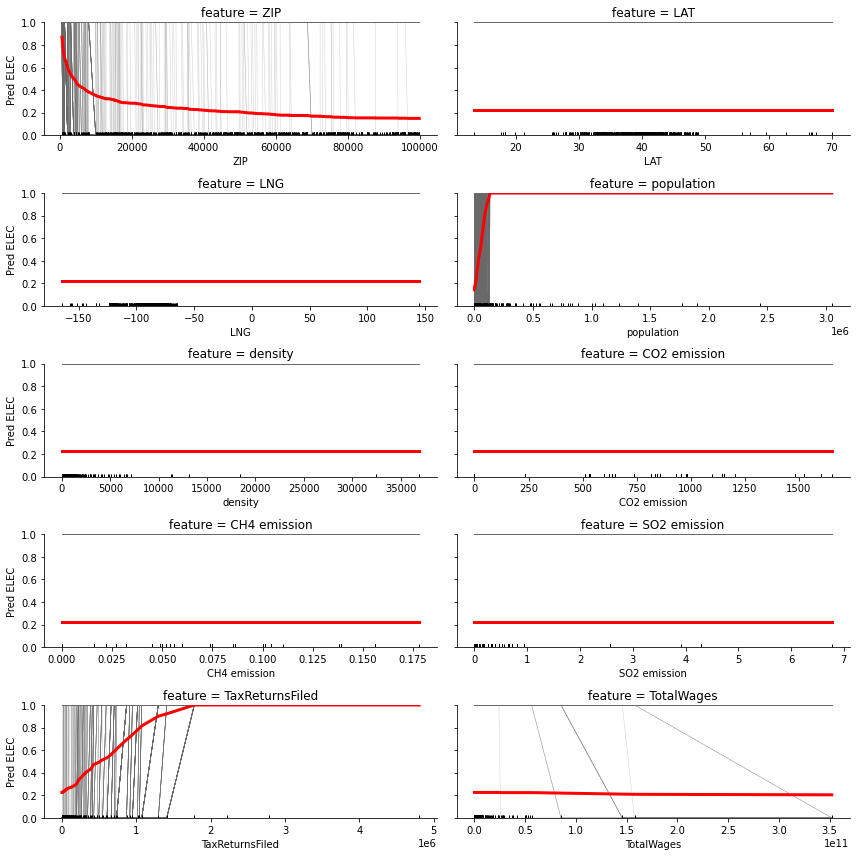

In [ ]:
# columns to plot
features = test_X1_df.columns

# create dict of ICE data for grid of ICE plots
test_ice_dfs = {feat: ice(data=test_X1_df, column=feat, predict=LR1.predict) 
                 for feat in features}

plot_ice_grid(test_ice_dfs, test_X1_df, features,
                    ax_ylabel='Pred ELEC', alpha=0.3, plot_pdp=True,
                    pdp_kwargs={'c': 'red', 'linewidth': 3},
                    linewidth=0.5, c='dimgray')
plt.ylim([0,1])
plt.subplots_adjust(top=0.89)
plt.tight_layout()

### Random Forest Classifier

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



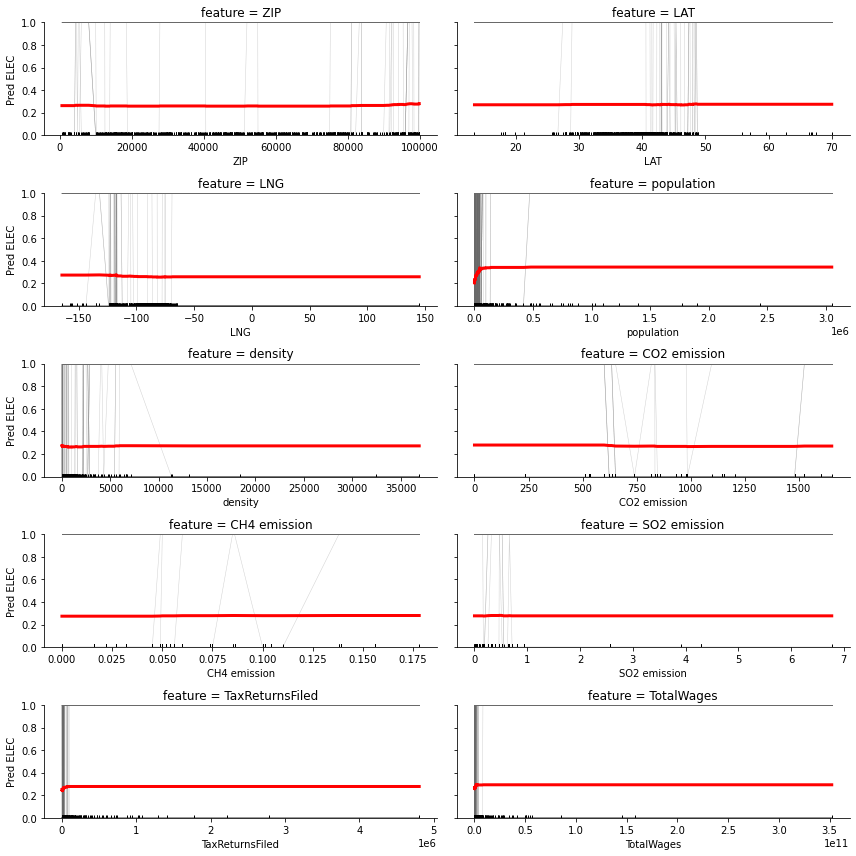

In [ ]:
# columns to plot
features = test_X1_df.columns

clf = RandomForestClassifier()
clf = clf.fit(test_X1_df_arr, test_y1_df_arr)

# create dict of ICE data for grid of ICE plots
train_ice_dfs = {feat: ice(data=test_X1_df, column=feat, predict=clf.predict) 
                 for feat in features}

plot_ice_grid(train_ice_dfs, test_X1_df, features,
                    ax_ylabel='Pred ELEC', alpha=0.3, plot_pdp=True,
                    pdp_kwargs={'c': 'red', 'linewidth': 3},
                    linewidth=0.5, c='dimgray')
plt.ylim([0,1])
plt.subplots_adjust(top=0.89)
plt.tight_layout()

### TPOT Classifier

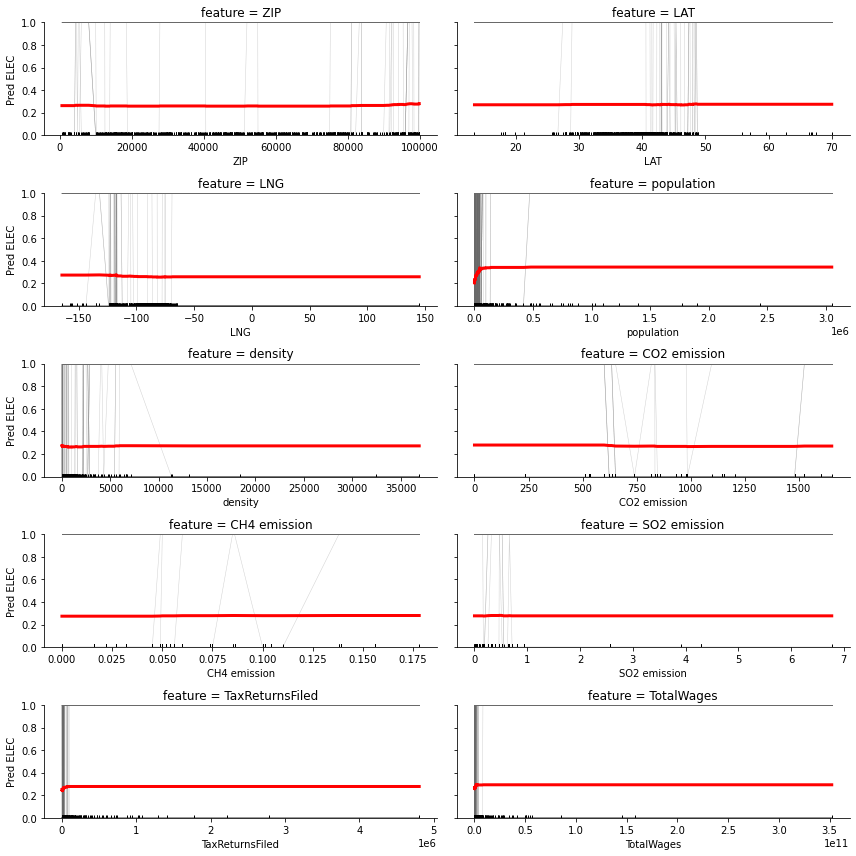

In [ ]:
# columns to plot
features = test_X1_df.columns

# create dict of ICE data for grid of ICE plots
train_ice_dfs = {feat: ice(data=test_X1_df, column=feat, predict=clf.predict) 
                 for feat in features}

plot_ice_grid(train_ice_dfs, test_X1_df, features,
                    ax_ylabel='Pred ELEC', alpha=0.3, plot_pdp=True,
                    pdp_kwargs={'c': 'red', 'linewidth': 3},
                    linewidth=0.5, c='dimgray')
plt.ylim([0,1])
plt.subplots_adjust(top=0.89)
plt.tight_layout()

## Regression Models

In [ ]:
test_X2_df = pd.DataFrame(X2_test, columns= x.columns)
test_X2_df = test_X2_df.sample(frac = 0.1, random_state = 4)
test_X2_df.head()

ZIP        LAT        LNG  population  density  CO2 emission  \
2425  31217.0  32.844147 -83.500044     17044.0     61.1       860.179   
1264   7939.0  40.667382 -74.553908       254.0    726.9       652.458   
1802   3857.0  43.070909 -70.946875      9161.0    280.9       528.238   
4182  11356.0  40.784850 -73.841279     24178.0   5902.8       634.612   
20    32754.0  28.687109 -80.919193     11398.0     32.1       835.079   

      CH4 emission  SO2 emission  TaxReturnsFiled    TotalWages       N2  
2425         0.060         0.189      7553.000000  1.710820e+08  13680.0  
1264         0.045         0.255     17619.753104  8.958389e+08      0.0  
1802         0.074         0.084      4562.000000  2.048194e+08      0.0  
4182         0.022         0.010     31476.000000  1.071020e+09  24510.0  
20           0.049         0.152      5007.000000  1.820053e+08  10660.0

In [ ]:
test_y2_df = pd.DataFrame(y2_test, columns= y.columns)
test_y2_df = test_y2_df.sample(frac = 0.1, random_state = 4)
test_y2_df.head()

ELEC
2425     1
1264     0
1802     1
4182     1
20       0

In [ ]:
test_y2_df_arr = np.array(test_y2_df)
test_X2_df_arr = np.array(test_X2_df)

### Linear Regression

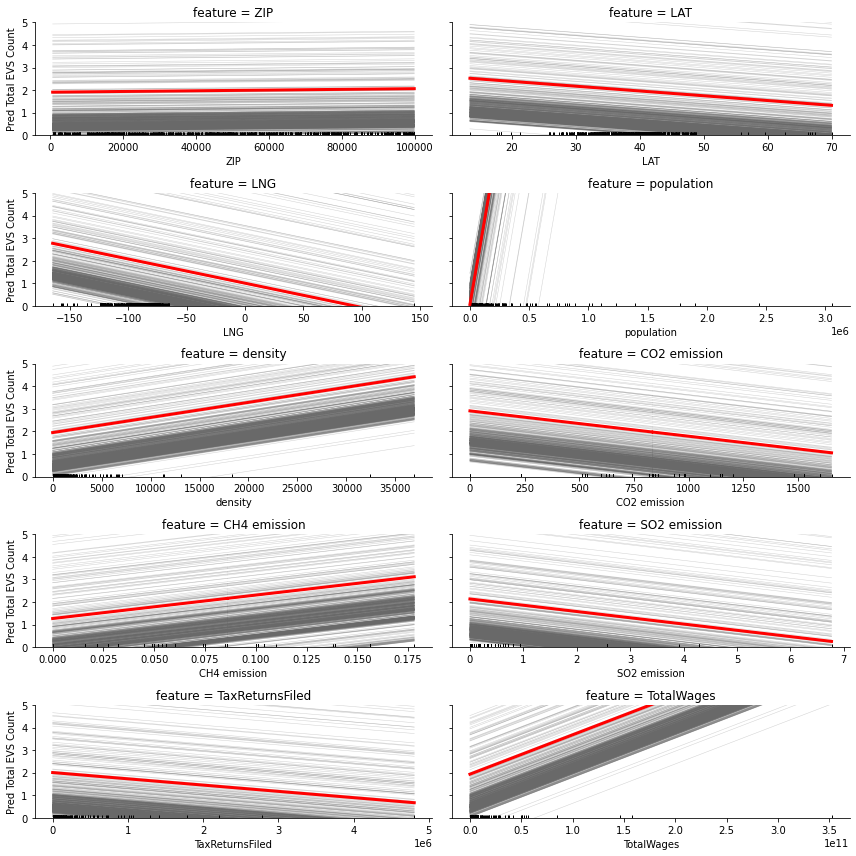

In [ ]:
# columns to plot
features = test_X2_df.columns

# create dict of ICE data for grid of ICE plots
test_ice_dfs = {feat: ice(data=test_X2_df, column=feat, predict=LR2.predict) 
                 for feat in features}

plot_ice_grid(test_ice_dfs, test_X2_df, features,
                    ax_ylabel='Pred Total EVS Count', alpha=0.3, plot_pdp=True,
                    pdp_kwargs={'c': 'red', 'linewidth': 3},
                    linewidth=0.5, c='dimgray')
plt.ylim([0,5])
plt.subplots_adjust(top=0.89)
plt.tight_layout()

### ADA Classifier

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



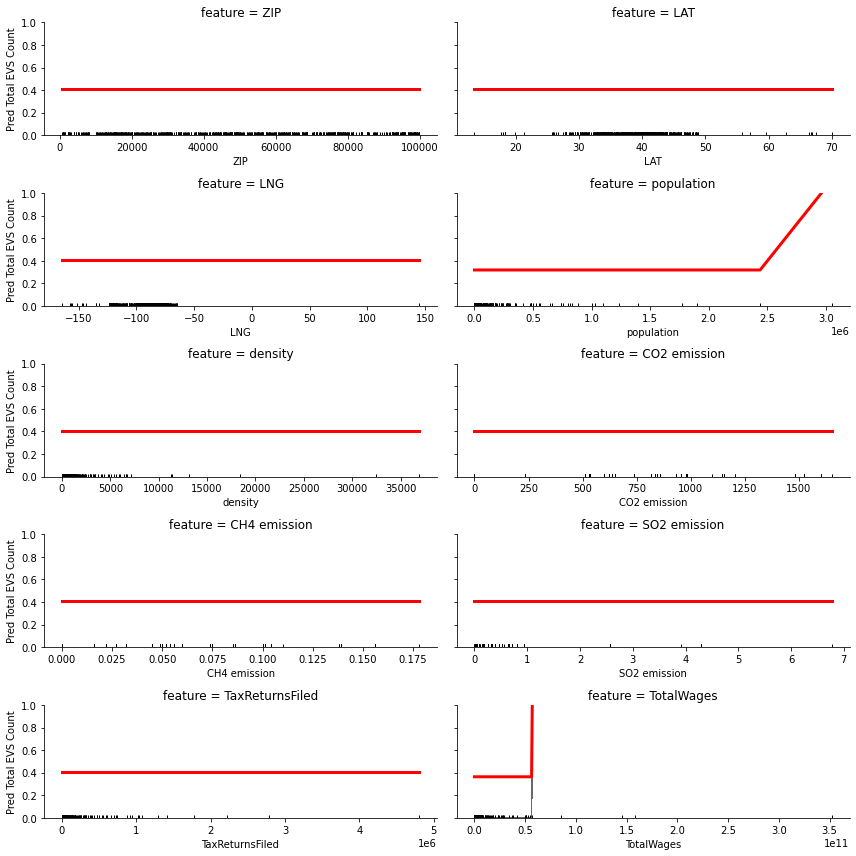

In [ ]:
# columns to plot
features = test_X2_df.columns

clf = AdaBoostClassifier()
clf = clf.fit(test_X2_df_arr, test_y2_df_arr)

# create dict of ICE data for grid of ICE plots
train_ice_dfs = {feat: ice(data=test_X2_df, column=feat, predict=clf.predict) 
                 for feat in features}

plot_ice_grid(train_ice_dfs, test_X2_df, features,
                    ax_ylabel='Pred Total EVS Count', alpha=0.3, plot_pdp=True,
                    pdp_kwargs={'c': 'red', 'linewidth': 3},
                    linewidth=0.5, c='dimgray')
plt.ylim([0,1])
plt.subplots_adjust(top=0.89)
plt.tight_layout()

### TPOT Classifier

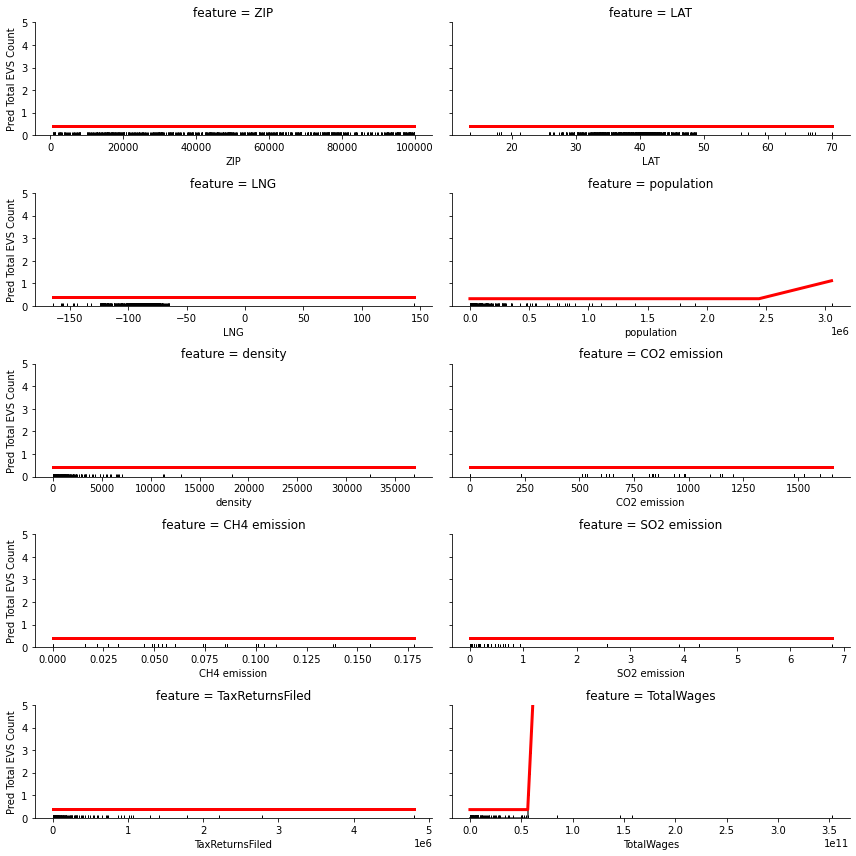

In [ ]:
# columns to plot
features = test_X2_df.columns

# create dict of ICE data for grid of ICE plots
train_ice_dfs = {feat: ice(data=test_X2_df, column=feat, predict=clf.predict) 
                 for feat in features}

plot_ice_grid(train_ice_dfs, test_X2_df, features,
                    ax_ylabel='Pred Total EVS Count', alpha=0.3, plot_pdp=True,
                    pdp_kwargs={'c': 'red', 'linewidth': 3},
                    linewidth=0.5, c='dimgray')
plt.ylim([0,5])
plt.subplots_adjust(top=0.89)
plt.tight_layout()

## **INFERENCE** - Based on Partial Dependence Plots

> We used a **low sample size to observe the PDPs** owing to RAM constraints, however **we got a directional insight into the role every predictor variable is playing** in terms of Electric Charging Station Count in the USA.


> The Logistic Regression model predicts a very **high probablity of having an electric station ('ELEC') in the ZIPCODES starting with 0 and 1** - This points to the states of Connecticut, Massachusetts, Maine, New Hampshire, New Jersey, Puerto Rico, Rhode Island, Vermont. New York, Delware and Pennsylvania. The **interpretation is good and it probably misses out on ZIPs starting with 9 (i.e. California as it is the only state on the west coast with unusually high number of charging stations)**.

> The Random Forest Classifier gave a good insight of 'ELEC' in terms of population. It predits a **lower probablity of an electric charging station in areas with lower population** which makes sense.

> TPOT Classifier predicts a **lower probablity of charging stations in areas with lower 'TotalWages'**. Owing to high cost of EVs, this interpretation is valid.

> From the above points we can conclude that **ZIPCODES location (North East) coupled with higher population and high earningn individuals** is the deciding factor for the number of Electric Charging Stations across the USA.

> We saw two very interesting insights from the regression models - 

1. The **CO2 content increases with the reduction in EV charging stations**. This points towards high use of 'gas' operated vehicles.

2. **Increase in population, density and wages are pointing to steep increase in 'Total EVS Count'** which ties back to our classification models as well.

## **PROJECT CONCLUSIONS**

<img src = 'https://drive.google.com/uc?id=11j6tpYUN59H2QSiJKSDpeUw9jwWomsEg'>

> This project gives us a very pratical peak into the life of a professional working in data science or analytics.

> We started our analysis by merging two heavy datasets that provide us with nearly exhaustive information about EV Charging Stations.

> We then moved onto merging additional datasets which could provide us with some information outside of the EV industry which could point towards the dependencies while making predictive models.

> We ran two sets of models - Three for Classification and three for regression.

> Both sets had different target variables however, in terms of dependecies, both sets pointed towards similar results which was an awesome validation point.

> With time constraints in terms of execution time, we were still able to model and run multiple iterations of our code and got decent accuracy in terms of any of the error metrices - R2, MAE or MSE.

> With some more firepower, we could potentially develop really good analytical models that could predict the location or the count of EV Charging station in the United States with >95% accuracy.

> **This project also gave us insight on not only environmental but anthropological factors which play a role in deciding the location of such stations from the perspective of business.**

> **Any firm working on developing more EV charging stations could potentially observe these dependencies and place them strategically from the perspective of generating more profits.**

> **The government could also use this analysis to potentially explore and increase urbanization in certain areas - If you bring the infrastructure, people will migrate.**